<a href="https://colab.research.google.com/github/EdbertJunus/Pizza-Sales/blob/main/Big_Data_Analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
! pip install apyori
! pip install graphviz
! pip install pydotplus


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=60e9351b5bdfd0ff31e3e38bee83f70e4f6280ddf1d7194cbe89bd846ad5f516
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mysarahmadbhat/pizza-place-sales
#https://www.kaggle.com/datasets/mysarahmadbhat/pizza-place-sales

  0% 0.00/417k [00:00<?, ?B/s]
100% 417k/417k [00:00<00:00, 96.7MB/s]


In [ ]:
! mkdir data

In [ ]:
! unzip pizza-place-sales.zip -d data

Archive:  pizza-place-sales.zip
  inflating: data/order_details.csv  
  inflating: data/orders.csv         
  inflating: data/pizza_types.csv    
  inflating: data/pizzas.csv         


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px


In [ ]:
orders_df = pd.read_csv("data/orders.csv")
order_details_df = pd.read_csv("data/order_details.csv")
pizza_types_df = pd.read_csv("data/pizza_types.csv", encoding='unicode_escape')
pizza_df = pd.read_csv("data/pizzas.csv")

In [ ]:
merge_df = (orders_df.merge(order_details_df, how='left', on=['order_id'])).merge(pizza_df,how='left', on=['pizza_id']).merge(pizza_types_df,how="left", on=['pizza_type_id'])

In [ ]:
total_price_order = merge_df[['order_id', 'quantity', 'price']].copy()
total_price_order['sub_total'] = total_price_order['quantity'] * total_price_order['price']
new_total_price_order = total_price_order.groupby('order_id').sum()
merge_df = merge_df.merge(new_total_price_order[['sub_total']], how='left', on=['order_id'])
merge_df = merge_df.rename(columns = {'sub_total': 'total'})


# **Q1: What is our order value and order total**

In [ ]:
merge_df.head()

order_id        date      time  order_details_id       pizza_id  quantity  \
0         1  2015-01-01  11:38:36                 1     hawaiian_m         1   
1         2  2015-01-01  11:57:40                 2  classic_dlx_m         1   
2         2  2015-01-01  11:57:40                 3  five_cheese_l         1   
3         2  2015-01-01  11:57:40                 4    ital_supr_l         1   
4         2  2015-01-01  11:57:40                 5     mexicana_m         1   

  pizza_type_id size  price                       name category  \
0      hawaiian    M  13.25         The Hawaiian Pizza  Classic   
1   classic_dlx    M  16.00   The Classic Deluxe Pizza  Classic   
2   five_cheese    L  18.50      The Five Cheese Pizza   Veggie   
3     ital_supr    L  20.75  The Italian Supreme Pizza  Supreme   
4      mexicana    M  16.00         The Mexicana Pizza   Veggie   

                                         ingredients  total  
0           Sliced Ham, Pineapple, Mozzarella Cheese  13.25  
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...  92.00  
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...  92.00  
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...  92.00  
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...  92.00

In [ ]:
test = order_details_df['order_id'].value_counts(ascending=False)
test

18845    21
10760    21
18280    15
21158    15
17464    15
         ..
10351     1
10355     1
10357     1
10360     1
21350     1
Name: order_id, Length: 21350, dtype: int64

In [ ]:
new_total_price_order[['quantity','price']].describe()

quantity         price
count  21350.000000  21350.000000
mean       2.321967     37.561813
std        1.825735     28.650296
min        1.000000      9.750000
25%        1.000000     17.950000
50%        2.000000     32.250000
75%        3.000000     49.000000
max       28.000000    349.900000

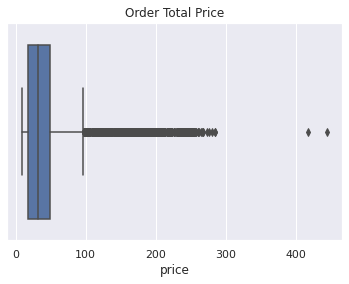

In [ ]:
sns.set(style="darkgrid")
ax = sns.boxplot(x=new_total_price_order['sub_total']).set(
    title='Order Total Price',
    xlabel='price', 
)

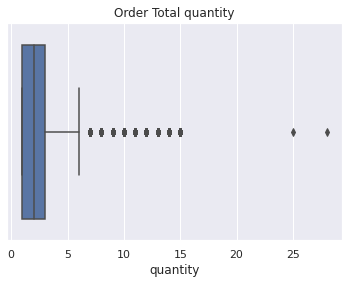

In [ ]:
sns.set(style="darkgrid")
ax = sns.boxplot(x=new_total_price_order['quantity']).set(
    title='Order Total quantity',
)

# **Q2: What days and times do we tend to be busiest?**

## Plot by Hours and Times

**Time Stamp**

In [ ]:
timestamp_df = merge_df.groupby('time').sum()
timestamp_df['time'] = timestamp_df.index
timestamp_df = timestamp_df.reset_index(drop=True)
timestamp_df['time'] = timestamp_df['time'].astype('datetime64[ns]')
timestamp_df['time'] = pd.to_datetime(timestamp_df['time'])
timestamp_df['time'] = timestamp_df['time'].dt.time

In [ ]:
timestamp_df.head

<bound method NDFrame.head of        order_id  order_details_id  quantity  price   total      time
0         76704            174458         4  83.00  332.00  09:52:21
1         15092             34190         1  12.50   12.50  10:25:19
2         32586             74103         3  53.25  159.75  10:34:34
3         16692             38001         3  52.75  158.25  10:43:04
4         15741             35832         3  50.25  150.75  10:50:46
...         ...               ...       ...    ...     ...       ...
16377     32876             74463         2  33.50   67.00  23:05:08
16378     28024             63473         2  26.00   52.00  23:05:16
16379     10590             24141         3  40.00  120.00  23:05:17
16380      9399             21288         3  61.50  184.50  23:05:24
16381     24866             56441         2  32.50   65.00  23:05:52

[16382 rows x 6 columns]>

In [ ]:
time_df_by_quantity = timestamp_df[['time','quantity']]

In [ ]:
time_df_by_quantity

time  quantity
0      09:52:21         4
1      10:25:19         1
2      10:34:34         3
3      10:43:04         3
4      10:50:46         3
...         ...       ...
16377  23:05:08         2
16378  23:05:16         2
16379  23:05:17         3
16380  23:05:24         3
16381  23:05:52         2

[16382 rows x 2 columns]

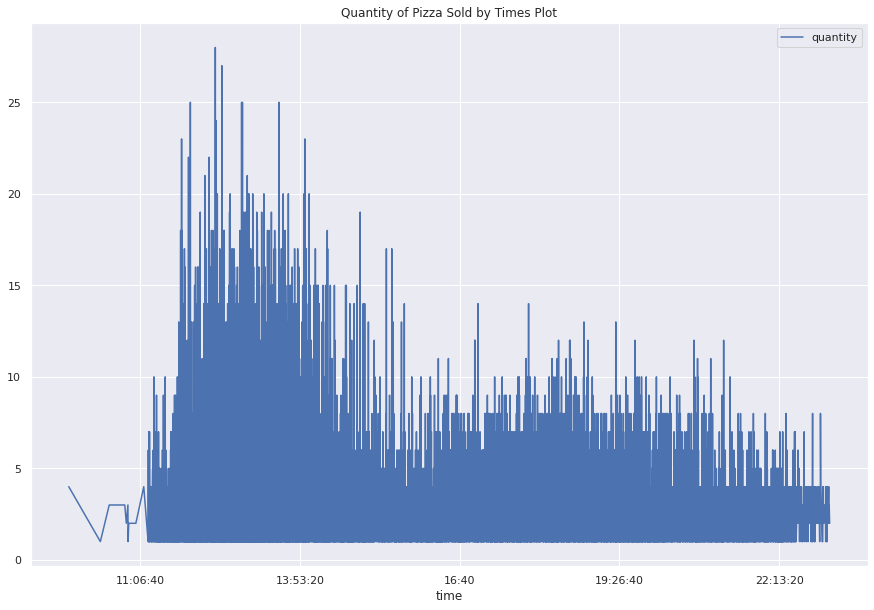

In [ ]:
time_df_by_quantity.plot(kind='line', x='time', y='quantity', title='Quantity of Pizza Sold by Times Plot', figsize=(15,10))

In [ ]:
time_df_by_quantity

time  quantity
0      09:52:21         4
1      10:25:19         1
2      10:34:34         3
3      10:43:04         3
4      10:50:46         3
...         ...       ...
16377  23:05:08         2
16378  23:05:16         2
16379  23:05:17         3
16380  23:05:24         3
16381  23:05:52         2

[16382 rows x 2 columns]

In [ ]:
fig = px.line(time_df_by_quantity, x="time", y="quantity")
fig.show()

In [ ]:
time_df_by_quantity.loc[:, ('time_str')] = time_df_by_quantity.loc[:, ('time')].astype(str)
time_df_by_quantity.loc[:, ('hours')]= [x[0:2] for x in time_df_by_quantity.loc[:, ('time_str')]]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
time_df_by_quantity.head()

time  quantity  time_str hours
0  09:52:21         4  09:52:21    09
1  10:25:19         1  10:25:19    10
2  10:34:34         3  10:34:34    10
3  10:43:04         3  10:43:04    10
4  10:50:46         3  10:50:46    10

**Hours**

In [ ]:
hours_df_by_quantity = time_df_by_quantity.groupby('hours').sum()
hours_df_by_quantity['hours'] = hours_df_by_quantity.index
hours_df_by_quantity = hours_df_by_quantity.reset_index(drop=True)

In [ ]:
hours_df_by_quantity

quantity hours
0          4    09
1         18    10
2       2728    11
3       6776    12
4       6413    13
5       3613    14
6       3216    15
7       4239    16
8       5211    17
9       5417    18
10      4406    19
11      3534    20
12      2545    21
13      1386    22
14        68    23

In [ ]:
fig = px.line(hours_df_by_quantity, x="hours", y="quantity")
fig.show()

In [ ]:
hours_df_by_order = time_df_by_quantity['hours'].value_counts().rename_axis('hours').reset_index(name='number_of_order')

In [ ]:
hours_df_by_order = hours_df_by_order.sort_values(by=['hours'])

In [ ]:
hours_df_by_order.head()

hours  number_of_order
14    09                1
13    10                8
10    11              967
0     12             1799
1     13             1781

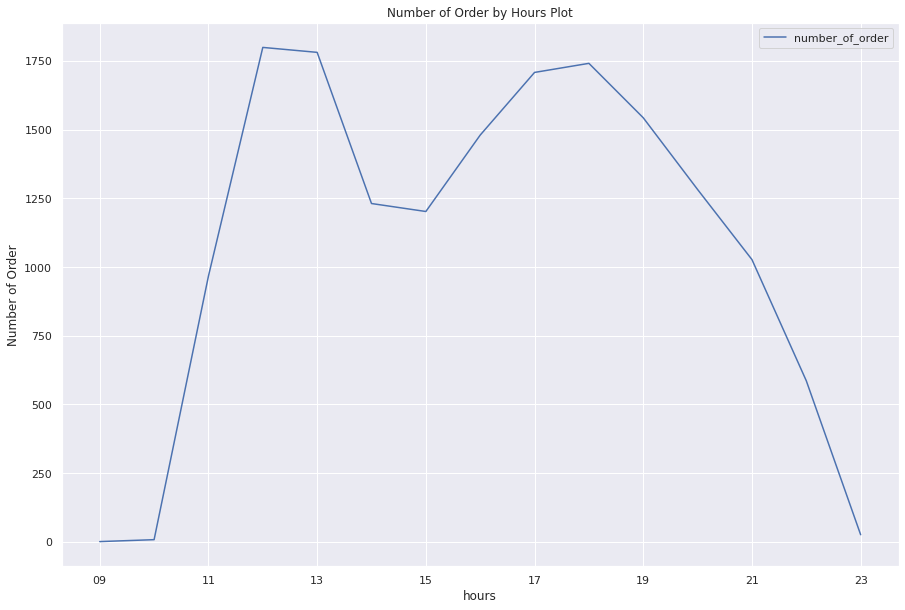

In [ ]:
hours_df_by_order.plot(kind='line',x = 'hours' , y = 'number_of_order', title="Number of Order by Hours Plot",figsize=(15, 10),
                   xlabel='hours', ylabel='Number of Order')

## Plot by Weeks

In [ ]:
week_df = merge_df.groupby('date').sum()
week_df['date'] = week_df.index
week_df = week_df.reset_index(drop=True)
week_df['date'] = pd.to_datetime(week_df['date'])

In [ ]:
week_df['week'] = week_df['date'].dt.isocalendar().week

In [ ]:
week_df_by_quantity = week_df[['week', 'quantity']].groupby('week').sum()

In [ ]:
week_df_by_quantity

quantity
week          
1          591
2          972
3          917
4          968
5          975
6          988
7          976
8          933
9          972
10         996
11         965
12         949
13         954
14        1025
15         968
16         967
17         975
18         934
19         985
20        1046
21         953
22         924
23         997
24         962
25         920
26         980
27        1066
28         950
29         981
30         985
31         926
32         955
33         994
34         959
35         866
36         945
37        1009
38         974
39         674
40        1008
41         794
42         933
43         876
44         810
45         970
46         944
47         908
48        1186
49        1013
50         959
51         962
52         693
53         442

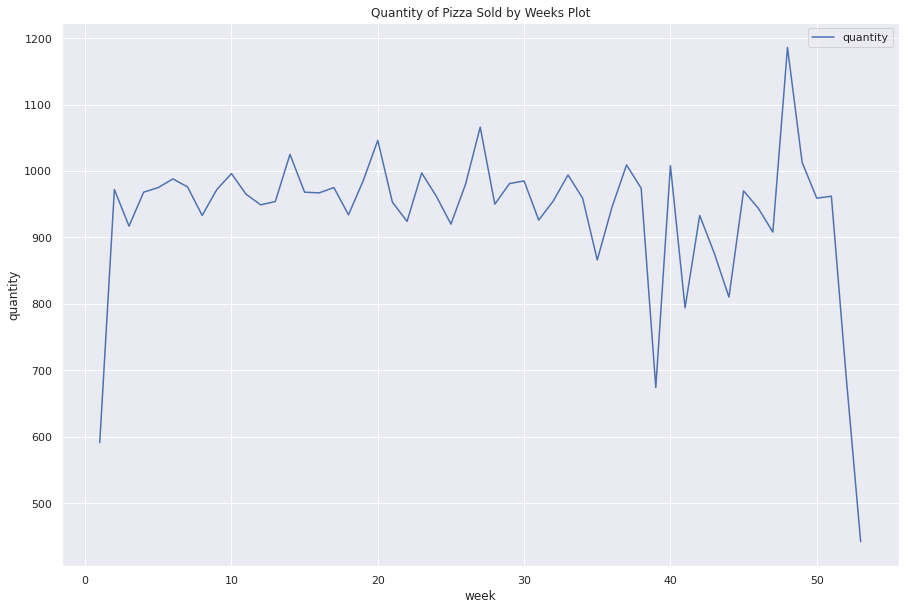

In [ ]:
week_df_by_quantity.plot(kind='line', title='Quantity of Pizza Sold by Weeks Plot', figsize=(15,10), xlabel='week', ylabel='quantity')

In [ ]:
week_count_df = week_df[['week']].value_counts().rename_axis('week').reset_index(name='number_of_order')

In [ ]:
week_count_df = week_count_df.sort_values(by=['week'])

In [ ]:
week_count_df

week  number_of_order
51     1                4
2      2                7
25     3                7
26     4                7
27     5                7
28     6                7
29     7                7
30     8                7
31     9                7
34    10                7
33    11                7
24    12                7
35    13                7
36    14                7
37    15                7
38    16                7
39    17                7
40    18                7
41    19                7
42    20                7
43    21                7
32    22                7
23    23                7
1     24                7
21    25                7
22    26                7
0     27                7
3     28                7
4     29                7
5     30                7
6     31                7
7     32                7
8     33                7
9     34                7
10    35                7
11    36                7
12    37                7
13    38                7
50    39                5
14    40                7
45    41                6
46    42                6
47    43                6
48    44                6
15    45                7
16    46                7
17    47                7
18    48                7
19    49                7
20    50                7
44    51                7
49    52                6
52    53                4

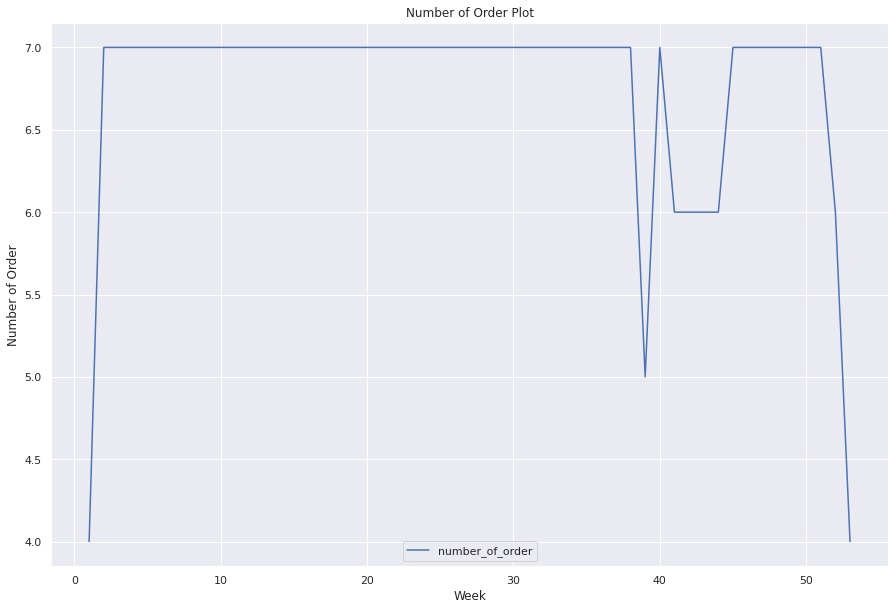

In [ ]:
week_count_df.plot(kind='line',x = 'week' , y = 'number_of_order', title="Number of Order Plot",figsize=(15, 10),
                   xlabel='Week', ylabel='Number of Order')

Month

In [ ]:
week_df['month'] = pd.DatetimeIndex(week_df['date']).month

In [ ]:
month_df_by_quantity = week_df[['month', 'quantity']].groupby('month').sum()

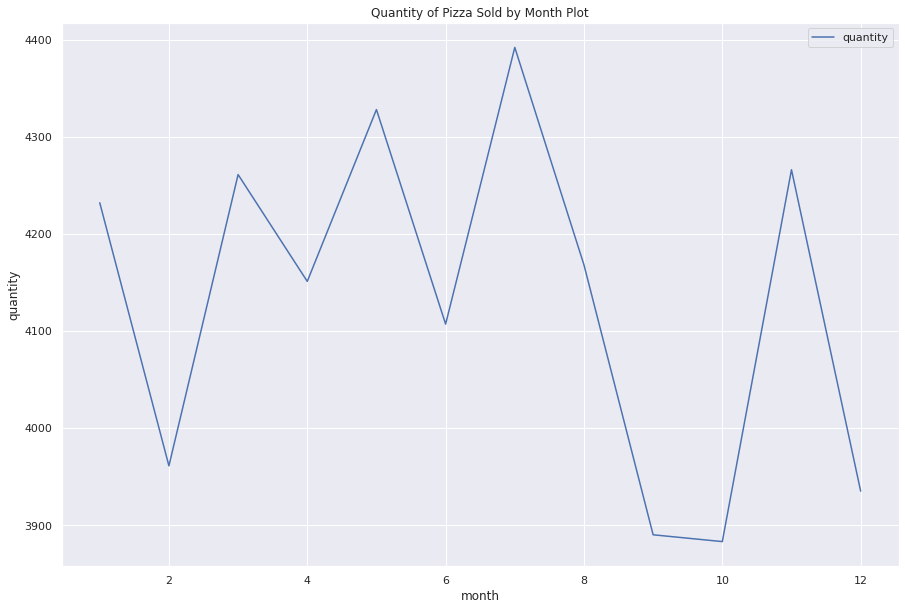

In [ ]:
month_df_by_quantity.plot(kind='line', title='Quantity of Pizza Sold by Month Plot', figsize=(15,10), xlabel='month', ylabel='quantity')

In [ ]:
month_count_df = week_df[['month']].value_counts().rename_axis('month').reset_index(name='number_of_order')

In [ ]:
month_count_df = month_count_df.sort_values(by=['month'])

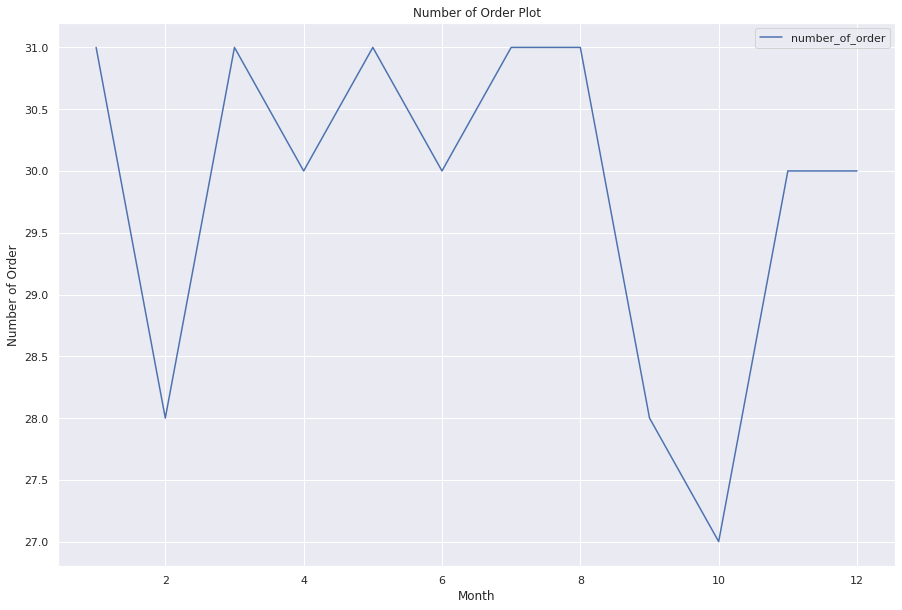

In [ ]:
month_count_df.plot(kind='line',x = 'month' , y = 'number_of_order', title="Number of Order Plot",figsize=(15, 10),
                   xlabel='Month', ylabel='Number of Order')

In [ ]:
week_df_by_quantity

quantity
week          
1          591
2          972
3          917
4          968
5          975
6          988
7          976
8          933
9          972
10         996
11         965
12         949
13         954
14        1025
15         968
16         967
17         975
18         934
19         985
20        1046
21         953
22         924
23         997
24         962
25         920
26         980
27        1066
28         950
29         981
30         985
31         926
32         955
33         994
34         959
35         866
36         945
37        1009
38         974
39         674
40        1008
41         794
42         933
43         876
44         810
45         970
46         944
47         908
48        1186
49        1013
50         959
51         962
52         693
53         442

In [ ]:
month_df_by_quantity

quantity
month          
1          4232
2          3961
3          4261
4          4151
5          4328
6          4107
7          4392
8          4168
9          3890
10         3883
11         4266
12         3935

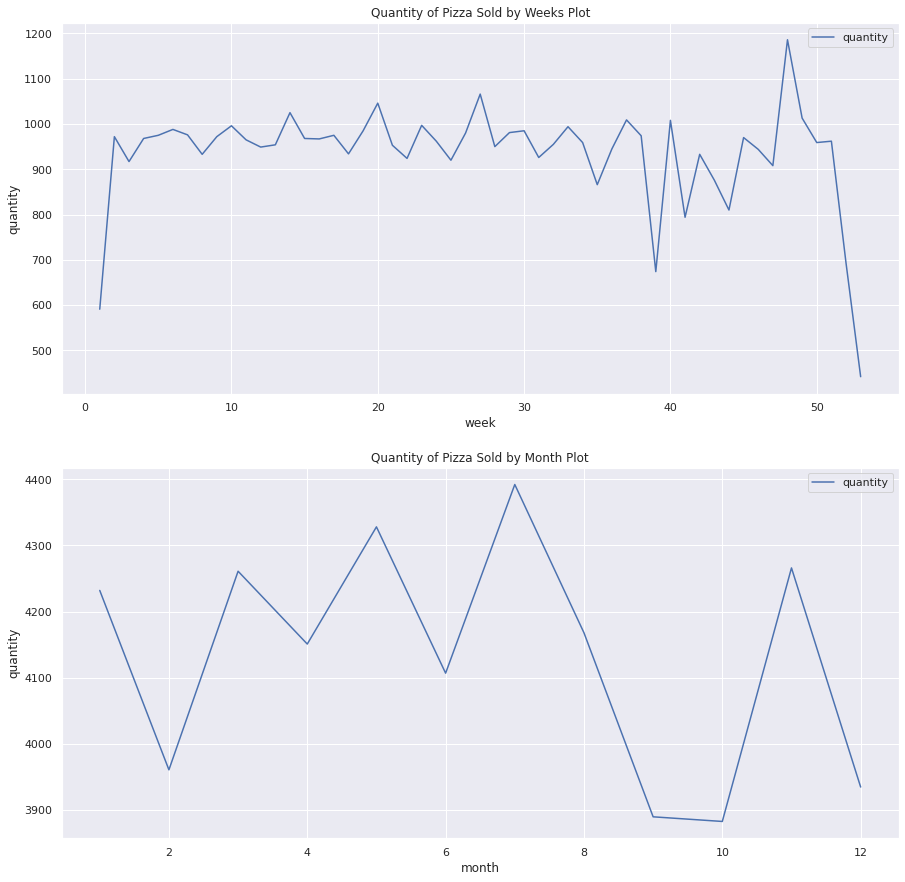

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

week_df_by_quantity.plot(kind='line', title='Quantity of Pizza Sold by Weeks Plot', ax=axes[0], xlabel='week', ylabel='quantity')
month_df_by_quantity.plot(kind='line', title='Quantity of Pizza Sold by Month Plot', ax=axes[1], xlabel='month', ylabel='quantity')

# **Q3: What are our best and worst-selling pizzas and category?**

In [ ]:
category_pizza_df = merge_df['category'].value_counts().rename_axis('pizza_category').reset_index(name='counts')

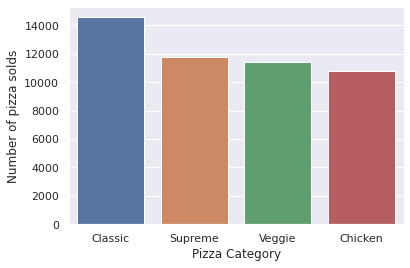

In [ ]:
ax = sns.barplot(y=category_pizza_df["counts"], x=category_pizza_df["pizza_category"])
ax.set(xlabel='Pizza Category', ylabel='Number of pizza solds')
ax

In [ ]:
category_detail_df = merge_df.copy()

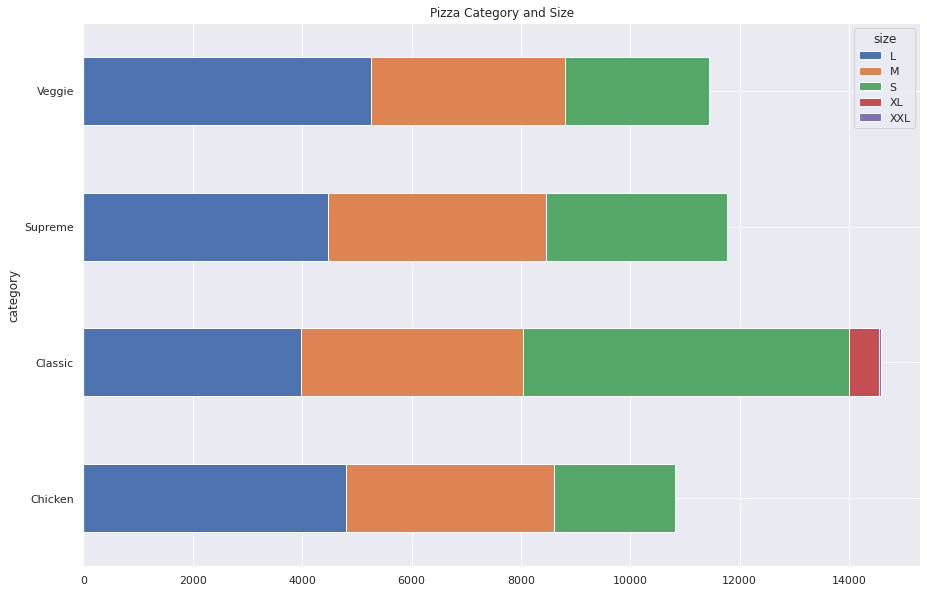

In [ ]:
ax = category_detail_df.groupby(['category', 'size']).size().unstack().plot.barh(stacked=True, title='Pizza Category and Size', figsize=(15, 10))

In [ ]:
list_of_category = list(category_pizza_df['pizza_category'].unique())

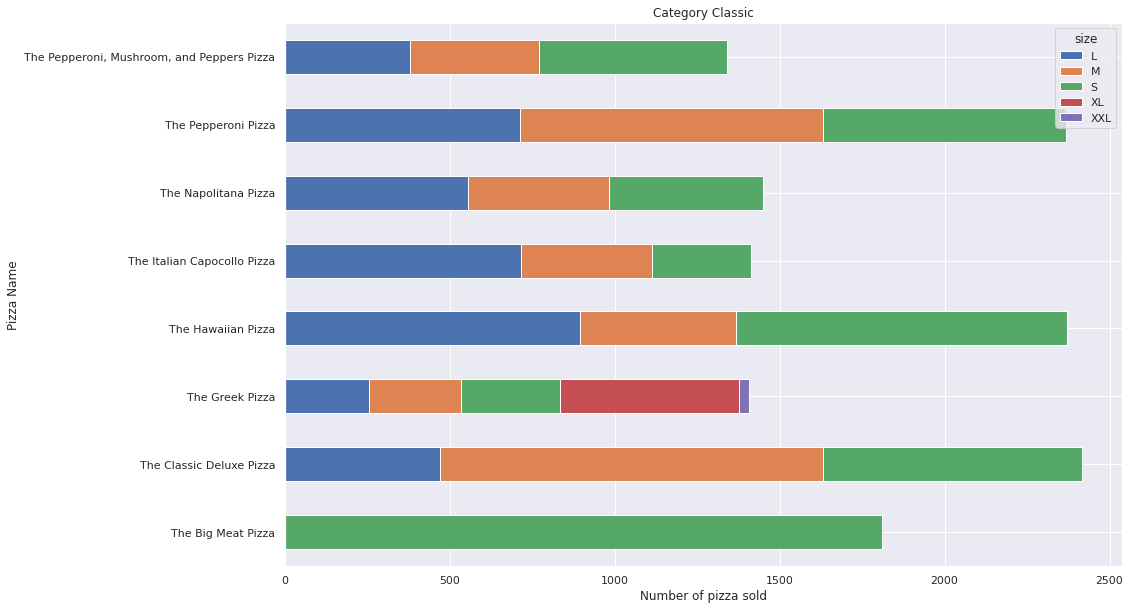

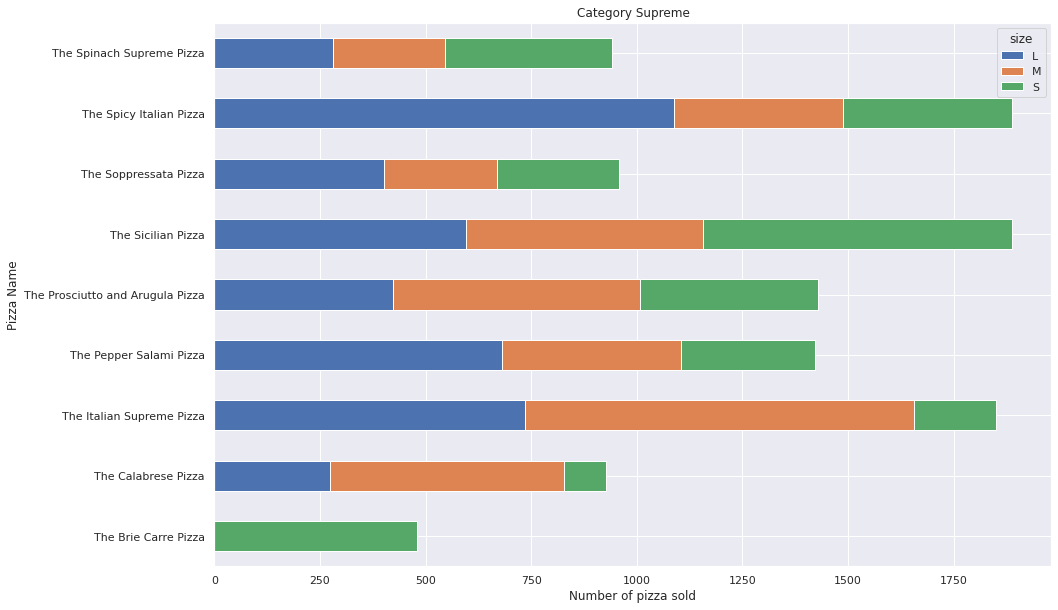

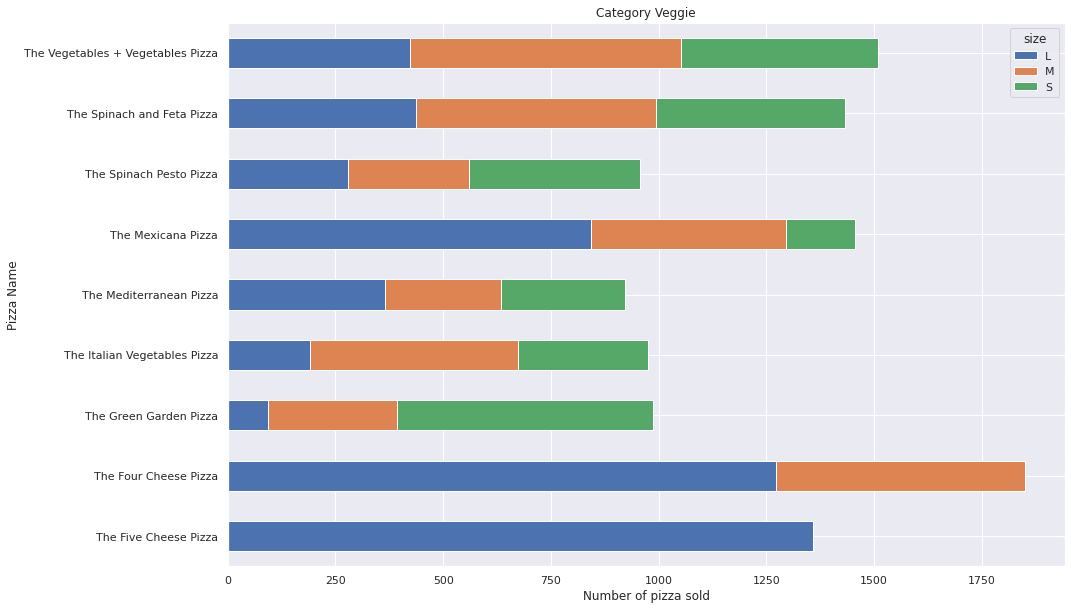

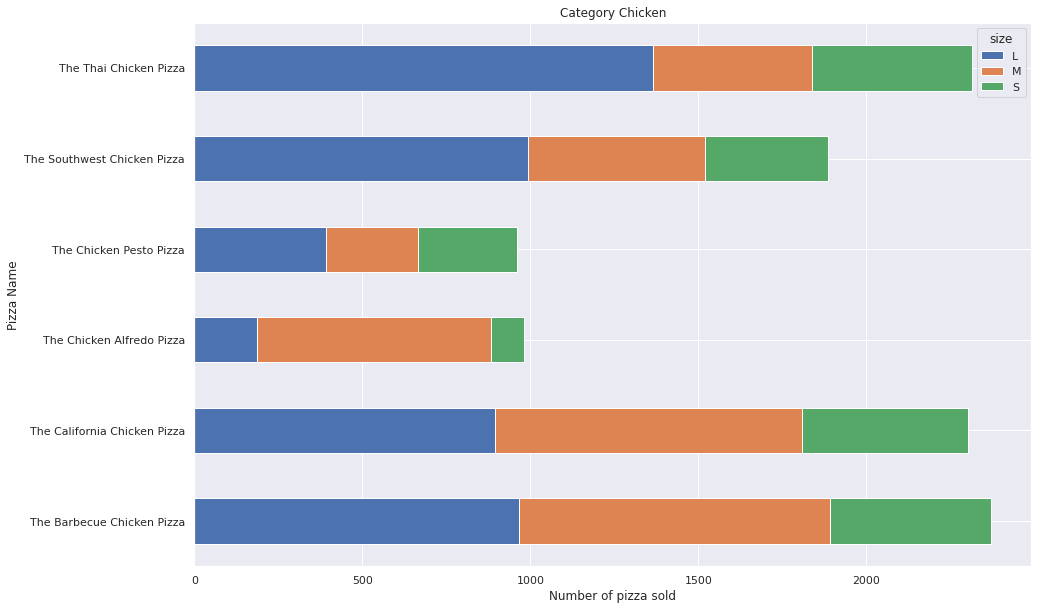

In [ ]:
category_detail_df = merge_df.copy()

for i in list_of_category:
  data = category_detail_df[category_detail_df['category'] == i]
  pizza_category_item = data['pizza_type_id'].value_counts().rename_axis('pizza_name').reset_index(name='counts')
  plot_title = "Category " + i
  # ax = data.groupby(['name', 'size']).apply(lambda x:x.groupby(level=[1]).sum().sort_values(ascending=False)).size().unstack().plot.barh(stacked=True, title=plot_title, figsize=(15, 10))
  ax = data.groupby(['name', 'size']).size().unstack().plot.barh(stacked=True, title=plot_title, figsize=(15, 10))
  ax.set_xlabel("Number of pizza sold")
  ax.set_ylabel("Pizza Name")

# **Q4: Which ingredients have relation?**

In [ ]:
ingredient_df = pd.read_csv("file.csv")

In [ ]:
ingredient_df.head()

order_id        date      time  total_pizza_type  total_pizza  total_price  \
0         1  2015-01-01  11:38:36                 1            1        13.25   
1         2  2015-01-01  11:57:40                 5            5        92.00   
2         3  2015-01-01  12:12:28                 2            2        37.25   
3         4  2015-01-01  12:16:31                 1            1        16.50   
4         5  2015-01-01  12:21:30                 1            1        16.50   

   is_veggie                               ingredients_category  \
0          0                             Ham, Pineapple, Cheese   
1          0  Chicken, Pineapple, Tomatoes, Peppers, Sauce, ...   
2          0  Salami, Capocollo, Tomatoes, Onions, Olives, G...   
3          0  Salami, Capocollo, Tomatoes, Onions, Olives, G...   
4          0  Salami, Capocollo, Tomatoes, Onions, Olives, G...   

                                         ingredients  
0           Sliced Ham, Pineapple, Mozzarella Cheese  
1  Chicken, Pineapple, Tomatoes, Red Peppers, Tha...  
2  Calabrese Salami, Capocollo, Tomatoes, Red Oni...  
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...  
4  Calabrese Salami, Capocollo, Tomatoes, Red Oni...

In [ ]:
testing = ingredient_df[ingredient_df['ingredients_category'].str.contains("Zucch")]
testing

order_id        date      time  total_pizza_type  total_pizza  \
8             9  2015-01-01  12:52:01                 9            9   
16           17  2015-01-01  13:53:00                10           11   
25           26  2015-01-01  14:54:26                 2            2   
46           47  2015-01-01  18:26:34                 2            2   
58           59  2015-01-01  19:40:08                 3            3   
...         ...         ...       ...               ...          ...   
21316     21317  2015-12-31  18:01:42                 2            2   
21318     21319  2015-12-31  18:07:19                 2            2   
21325     21326  2015-12-31  18:38:38                 3            3   
21327     21328  2015-12-31  18:46:11                 3            3   
21335     21336  2015-12-31  19:19:26                 2            2   

       total_price  is_veggie  \
8           143.25          0   
16          184.50          0   
25           32.25          0   
46           32.75          0   
58           39.00          0   
...            ...        ...   
21316        36.25          1   
21318        28.50          0   
21325        58.00          0   
21327        51.50          0   
21335        34.75          0   

                                    ingredients_category  \
8      Pepperoni, Mushrooms, Onions, Peppers, Bacon, ...   
16     Chicken, Peppers, Tomatoes, Onions, Sauce, Sal...   
25     Pepperoni, Mushrooms, Onions, Peppers, Bacon, ...   
46     Chicken, Tomatoes, Peppers, Onions, Corn, Cila...   
58     Pepperoni, Mushrooms, Peppers, Cheese, Eggplan...   
...                                                  ...   
21316  Spinach, Artichokes, Olives, Tomatoes, Cheese,...   
21318  Daniele, Arugula, Cheese, Mushrooms, Tomatoes,...   
21325  Chicken, Peppers, Tomatoes, Onions, Sauce, Cap...   
21327  Salami, Cheese, Mushrooms, Garlic, Tomatoes, P...   
21335  Pepperoni, Mushrooms, Peppers, Tomatoes, Onion...   

                                             ingredients  
8      Pepperoni, Mushrooms, Red Onions, Red Peppers,...  
16     Barbecued Chicken, Red Peppers, Green Peppers,...  
25     Pepperoni, Mushrooms, Red Onions, Red Peppers,...  
46     Chicken, Tomatoes, Red Peppers, Red Onions, Ja...  
58     Pepperoni, Mushrooms, Green Peppers, Mozzarell...  
...                                                  ...  
21316  Spinach, Artichokes, Kalamata Olives, Sun-drie...  
21318  Prosciutto di San Daniele, Arugula, Mozzarella...  
21325  Barbecued Chicken, Red Peppers, Green Peppers,...  
21327  Soppressata Salami, Fontina Cheese, Mozzarella...  
21335  Pepperoni, Mushrooms, Green Peppers, Tomatoes,...  

[2331 rows x 9 columns]

In [ ]:
testing = ingredient_df[ingredient_df['total_pizza_type'] > 1]

In [ ]:
testing['ingredients'].values

array(['Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce, Pepperoni, Mushrooms, Red Onions, Bacon, Calabrese Salami, Capocollo, Green Olives, Garlic, Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Jalapeno Peppers, Cilantro, Corn, Chipotle Sauce',
       'Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic, Prosciutto di San Daniele, Arugula, Mozzarella Cheese',
       'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce, Kalamata Olives, Feta Cheese, Garlic, Beef Chuck Roast',
       ...,
       'Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese, Bacon, Pepperoni, Italian Sausage, Chorizo Sausage, Soppressata Salami, Mozzarella Cheese, Mushrooms',
       'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce, Chicken, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce, Calabrese Salami, Capocollo, Green Olives, Garli

In [ ]:
from apyori import apriori

ingredients = [ i.split(", ") for i in testing['ingredients']]
print(ingredients)
print(len(ingredients))

data = ingredients

association_rules = apriori(data, min_support=0.2, min_confidence=0.1, min_lift=2, max_length=200) 
association_results = list(association_rules)
support_list = []
confidence_list = []
print("=====================================[[[[")
print(association_results)
print("]]]]=====================================")
for item in association_results:
  pair = item[0] 
  items = [x for x in pair]
  print("Rule: " + items[0] + " -> " + items[1])
  print("Support: " + str(item[1]))
  support_list.append(str(item[1]))
  print("Confidence: " + str(item[2][0][2]))
  confidence_list.append(str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3]))
  print("=====================================")

[['Chicken', 'Pineapple', 'Tomatoes', 'Red Peppers', 'Thai Sweet Chilli Sauce', 'Pepperoni', 'Mushrooms', 'Red Onions', 'Bacon', 'Calabrese Salami', 'Capocollo', 'Green Olives', 'Garlic', 'Mozzarella Cheese', 'Provolone Cheese', 'Smoked Gouda Cheese', 'Romano Cheese', 'Blue Cheese', 'Jalapeno Peppers', 'Cilantro', 'Corn', 'Chipotle Sauce'], ['Calabrese Salami', 'Capocollo', 'Tomatoes', 'Red Onions', 'Green Olives', 'Garlic', 'Prosciutto di San Daniele', 'Arugula', 'Mozzarella Cheese'], ['Barbecued Chicken', 'Red Peppers', 'Green Peppers', 'Tomatoes', 'Red Onions', 'Barbecue Sauce', 'Kalamata Olives', 'Feta Cheese', 'Garlic', 'Beef Chuck Roast'], ['Pepperoni', 'Mushrooms', 'Red Onions', 'Red Peppers', 'Bacon', 'Capocollo', 'Tomatoes', 'Goat Cheese', 'Garlic', 'Oregano', 'Calabrese Salami', 'Green Olives', 'Artichokes', 'Peperoncini verdi', 'Spinach', 'Feta Cheese', 'Jalapeno Peppers', 'Cilantro', 'Corn', 'Chipotle Sauce', 'Sun-dried Tomatoes', 'Pesto Sauce', 'Green Peppers', 'Zucchini']

In [ ]:
from statistics import mean
#min support and mincof 0.1
support_list_first = [ float(i) for i in support_list ]
confidence_list_first = [ float(i) for i in confidence_list ]
print(mean(support_list_first))
print(mean(confidence_list_first))

0.21854640403579487
0.837304482284503


In [ ]:
pizza_types_list = pizza_types_df.values.tolist()
pizza_types_ingredient_list = [i[3].split(", ") for i in pizza_types_list]
print(pizza_types_list)
print(len(pizza_types_list))

[['bbq_ckn', 'The Barbecue Chicken Pizza', 'Chicken', 'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce'], ['cali_ckn', 'The California Chicken Pizza', 'Chicken', 'Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese'], ['ckn_alfredo', 'The Chicken Alfredo Pizza', 'Chicken', 'Chicken, Red Onions, Red Peppers, Mushrooms, Asiago Cheese, Alfredo Sauce'], ['ckn_pesto', 'The Chicken Pesto Pizza', 'Chicken', 'Chicken, Tomatoes, Red Peppers, Spinach, Garlic, Pesto Sauce'], ['southw_ckn', 'The Southwest Chicken Pizza', 'Chicken', 'Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce'], ['thai_ckn', 'The Thai Chicken Pizza', 'Chicken', 'Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce'], ['big_meat', 'The Big Meat Pizza', 'Classic', 'Bacon, Pepperoni, Italian Sausage, Chorizo Sausage'], ['classic_dlx', 'The Classic Deluxe Pizza', 'Classic', 'Pepperoni, Mushrooms, Red Onion

In [ ]:
#Frequent Pattern

from apyori import apriori

data = pizza_types_ingredient_list
# print(data)
 
association_rules = apriori(data, min_support=0.1, min_confidence=0.1, min_lift=2, max_length=200) 
association_results = list(association_rules)
print("=====================================[[[[")
print(association_results)
print("]]]]=====================================")
for item in association_results:
  pair = item[0] 
  items = [x for x in pair]
  print("Rule: " + items[0] + " -> " + items[1])
  print("Support: " + str(item[1]))
  print("Confidence: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3]))
  print("=====================================")
   

=====================================[[[[
[RelationRecord(items=frozenset({'Red Peppers', 'Chicken'}), support=0.125, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Chicken'}), items_add=frozenset({'Red Peppers'}), confidence=0.8, lift=2.56), OrderedStatistic(items_base=frozenset({'Red Peppers'}), items_add=frozenset({'Chicken'}), confidence=0.4, lift=2.56)]), RelationRecord(items=frozenset({'Garlic', 'Tomatoes', 'Capocollo'}), support=0.125, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Capocollo'}), items_add=frozenset({'Garlic', 'Tomatoes'}), confidence=1.0, lift=2.2857142857142856), OrderedStatistic(items_base=frozenset({'Garlic', 'Tomatoes'}), items_add=frozenset({'Capocollo'}), confidence=0.2857142857142857, lift=2.2857142857142856)])]
]]]]=====================================
Rule: Red Peppers -> Chicken
Support: 0.125
Confidence: 0.8
Lift: 2.56
Rule: Garlic -> Tomatoes
Support: 0.125
Confidence: 1.0
Lift: 2.2857142857142856


In [ ]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
# pd.set_option('max_colwidth', -1)


# orders_df = pd.read_csv("data/orders.csv")
# order_details_df = pd.read_csv("data/order_details.csv")
# pizza_types_df = pd.read_csv("data/pizza_types.csv", encoding='unicode_escape')
# pizza_df = pd.read_csv("data/pizzas.csv")


# #registros de cada csv
# print(len(pizza_types_df),len(pizza_df),len(order_details_df),len(orders_df))


# #df_all=(
# #orders_df.merge(order_details_df, how='inner', on=['order_id'])
# #        .merge(pizza_df,how='inner', on=['pizza_id'])
# #        .merge(pizza_types_df, how='inner', on=['pizza_type_id'])
# #        .assign(detail_price=lambda x: x.quantity * x.price)
# #
# #)
# df_all=(
# orders_df.join(order_details_df.set_index('order_id'),  on=['order_id'])
#         .join(pizza_df.set_index('pizza_id'), on=['pizza_id'])
#         .join(pizza_types_df.set_index('pizza_type_id'), on=['pizza_type_id'])
#         .assign(detail_price=lambda x: x.quantity * x.price)

# )
# print(df_all)
# #print(1234)
# print("==")
# job_group = df_all.groupby(['order_id'])
# print(job_group)
# print("==")

# #job_group.head(10)
# #print(df_all.head())

# #import matplotlib.pyplot as plt
# #df_all_group_day=df_all.groupby('date')['price'].sum().reset_index()
# #plt.figure(figsize=(32,8))
# #plt.plot(df_all_group_day['price'])
# #plt.show()

In [ ]:
# #Frequent Pattern

# from apyori import apriori

# data = np.array(pizza_types_ingredient_list)
# npizza_types_ingredient_list=[]
# for x in data:
#   #print(x)

#   datax = []
#   for y in x:
#     if y.find(" "):
#       #print('AA')
#       chk = str(y.split()[-1])
#       if chk not in datax:
#         #print(chk)
#         datax.append(chk) 
#     else:
#       #print('BB')
#       if y not in datax:
#         #print(chk)
#         datax.append(y)
#     #print(datax) 
#     npizza_types_ingredient_list.append(datax)
#   #print('xx')
#   #print('xx')
#   #print('xx')

# association_rules = apriori(npizza_types_ingredient_list, min_support=0.12, min_confidence=0.8, min_lift=2, max_length=200) 
# association_results = list(association_rules)
# print("=====================================[[[[")
# print(association_results)
# print("]]]]=====================================")
# for item in association_results:
#   pair = item[0] 
#   items = [x for x in pair]
#   print("Rule: " + items[0] + " -> " + items[1])
#   print("Support: " + str(item[1]))
#   print("Confidence: " + str(item[2][0][2]))
#   print("Lift: " + str(item[2][0][3]))
#   print("=====================================")

# **Q5: Which ingredients are we use most?**

In [ ]:
merge_df.head()

order_id        date      time  order_details_id       pizza_id  quantity  \
0         1  2015-01-01  11:38:36                 1     hawaiian_m         1   
1         2  2015-01-01  11:57:40                 2  classic_dlx_m         1   
2         2  2015-01-01  11:57:40                 3  five_cheese_l         1   
3         2  2015-01-01  11:57:40                 4    ital_supr_l         1   
4         2  2015-01-01  11:57:40                 5     mexicana_m         1   

  pizza_type_id size  price                       name category  \
0      hawaiian    M  13.25         The Hawaiian Pizza  Classic   
1   classic_dlx    M  16.00   The Classic Deluxe Pizza  Classic   
2   five_cheese    L  18.50      The Five Cheese Pizza   Veggie   
3     ital_supr    L  20.75  The Italian Supreme Pizza  Supreme   
4      mexicana    M  16.00         The Mexicana Pizza   Veggie   

                                         ingredients  total  
0           Sliced Ham, Pineapple, Mozzarella Cheese  13.25  
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...  92.00  
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...  92.00  
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...  92.00  
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...  92.00

In [ ]:
ingredient_df.head()

order_id        date      time  total_pizza_type  total_pizza  total_price  \
0         1  2015-01-01  11:38:36                 1            1        13.25   
1         2  2015-01-01  11:57:40                 5            5        92.00   
2         3  2015-01-01  12:12:28                 2            2        37.25   
3         4  2015-01-01  12:16:31                 1            1        16.50   
4         5  2015-01-01  12:21:30                 1            1        16.50   

   is_veggie                               ingredients_category  \
0          0                             Ham, Pineapple, Cheese   
1          0  Chicken, Pineapple, Tomatoes, Peppers, Sauce, ...   
2          0  Salami, Capocollo, Tomatoes, Onions, Olives, G...   
3          0  Salami, Capocollo, Tomatoes, Onions, Olives, G...   
4          0  Salami, Capocollo, Tomatoes, Onions, Olives, G...   

                                         ingredients  
0           Sliced Ham, Pineapple, Mozzarella Cheese  
1  Chicken, Pineapple, Tomatoes, Red Peppers, Tha...  
2  Calabrese Salami, Capocollo, Tomatoes, Red Oni...  
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...  
4  Calabrese Salami, Capocollo, Tomatoes, Red Oni...

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
merge_df.head()

order_id        date      time  order_details_id       pizza_id  quantity  \
0         1  2015-01-01  11:38:36                 1     hawaiian_m         1   
1         2  2015-01-01  11:57:40                 2  classic_dlx_m         1   
2         2  2015-01-01  11:57:40                 3  five_cheese_l         1   
3         2  2015-01-01  11:57:40                 4    ital_supr_l         1   
4         2  2015-01-01  11:57:40                 5     mexicana_m         1   

  pizza_type_id size  price                       name category  \
0      hawaiian    M  13.25         The Hawaiian Pizza  Classic   
1   classic_dlx    M  16.00   The Classic Deluxe Pizza  Classic   
2   five_cheese    L  18.50      The Five Cheese Pizza   Veggie   
3     ital_supr    L  20.75  The Italian Supreme Pizza  Supreme   
4      mexicana    M  16.00         The Mexicana Pizza   Veggie   

                                         ingredients  total  
0           Sliced Ham, Pineapple, Mozzarella Cheese  13.25  
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...  92.00  
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...  92.00  
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...  92.00  
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...  92.00

In [ ]:
category_list = merge_df['category'].values.tolist()
print(category_list[:100])
len(category_list)

['Classic', 'Classic', 'Veggie', 'Supreme', 'Veggie', 'Chicken', 'Supreme', 'Supreme', 'Supreme', 'Supreme', 'Chicken', 'Classic', 'Supreme', 'Supreme', 'Classic', 'Veggie', 'Classic', 'Supreme', 'Supreme', 'Veggie', 'Supreme', 'Veggie', 'Veggie', 'Veggie', 'Chicken', 'Chicken', 'Chicken', 'Chicken', 'Classic', 'Chicken', 'Chicken', 'Chicken', 'Supreme', 'Veggie', 'Classic', 'Classic', 'Veggie', 'Supreme', 'Classic', 'Veggie', 'Classic', 'Chicken', 'Chicken', 'Supreme', 'Veggie', 'Veggie', 'Supreme', 'Veggie', 'Veggie', 'Veggie', 'Supreme', 'Veggie', 'Classic', 'Classic', 'Supreme', 'Classic', 'Veggie', 'Classic', 'Veggie', 'Classic', 'Chicken', 'Chicken', 'Chicken', 'Classic', 'Classic', 'Supreme', 'Supreme', 'Chicken', 'Classic', 'Veggie', 'Chicken', 'Classic', 'Veggie', 'Chicken', 'Veggie', 'Chicken', 'Veggie', 'Classic', 'Classic', 'Veggie', 'Classic', 'Supreme', 'Chicken', 'Veggie', 'Classic', 'Veggie', 'Classic', 'Classic', 'Chicken', 'Chicken', 'Classic', 'Supreme', 'Veggie', 'C

48620

In [ ]:
ingredients_not_edited = merge_df['ingredients'].values.tolist()
ingredients_not_edited_list1 = [ i.split(", ") for i in ingredients_not_edited]
ingredients_not_edited = [ [i.split(", ")] for i in ingredients_not_edited]
print(ingredients_not_edited[0:100])
len(ingredients_not_edited)

[[['Sliced Ham', 'Pineapple', 'Mozzarella Cheese']], [['Pepperoni', 'Mushrooms', 'Red Onions', 'Red Peppers', 'Bacon']], [['Mozzarella Cheese', 'Provolone Cheese', 'Smoked Gouda Cheese', 'Romano Cheese', 'Blue Cheese', 'Garlic']], [['Calabrese Salami', 'Capocollo', 'Tomatoes', 'Red Onions', 'Green Olives', 'Garlic']], [['Tomatoes', 'Red Peppers', 'Jalapeno Peppers', 'Red Onions', 'Cilantro', 'Corn', 'Chipotle Sauce', 'Garlic']], [['Chicken', 'Pineapple', 'Tomatoes', 'Red Peppers', 'Thai Sweet Chilli Sauce']], [['Calabrese Salami', 'Capocollo', 'Tomatoes', 'Red Onions', 'Green Olives', 'Garlic']], [['Prosciutto di San Daniele', 'Arugula', 'Mozzarella Cheese']], [['Calabrese Salami', 'Capocollo', 'Tomatoes', 'Red Onions', 'Green Olives', 'Garlic']], [['Calabrese Salami', 'Capocollo', 'Tomatoes', 'Red Onions', 'Green Olives', 'Garlic']], [['Barbecued Chicken', 'Red Peppers', 'Green Peppers', 'Tomatoes', 'Red Onions', 'Barbecue Sauce']], [['Kalamata Olives', 'Feta Cheese', 'Tomatoes', 'Gar

48620

In [ ]:
from itertools import chain

ingredients_not_edited_list1_flat = list(chain.from_iterable(ingredients_not_edited_list1))

ingredients_not_edited_list1_flat_df = pd.DataFrame(ingredients_not_edited_list1_flat, columns = ['ingredients'])
ingredients_not_edited_list1_flat_df.value_counts()

ingredients       
Garlic                27422
Tomatoes              26601
Red Onions            19547
Red Peppers           16284
Mozzarella Cheese     10333
                      ...  
Prosciutto              480
Pears                   480
Thyme                   480
Caramelized Onions      480
Brie Carre Cheese       480
Length: 65, dtype: int64

In [ ]:
unique_ingredients_list = ingredients_not_edited_list1_flat_df['ingredients'].unique().tolist()

In [ ]:
# from itertools import chain
# flatten_ingredients_not_edited = list(chain.from_iterable(ingredients_not_edited))

# flatten_ingredients_not_edit_df = pd.DataFrame(flatten_ingredients_not_edited, columns = ['ingredients_category'])
# data_ingredient_df = flatten_ingredients_not_edit_df.value_counts().rename_axis('ingredients').reset_index(name='occurence')

In [ ]:
# pd.set_option("max_rows", None)
# data_ingredient_df

In [ ]:
# def pad_lists(lists, pad_value=0):

#   # Find the maximum length of the lists
#   max_length = max(len(lst) for lst in lists)

#   # Create a new list to hold the padded lists
#   padded_lists = []

#   # Iterate over the original lists
#   for lst in lists:
#     # Calculate the number of padding elements needed
#     num_padding = max_length - len(lst)

#     # Pad the list with the specified value
#     padded_lst = lst + [pad_value] * num_padding

#     # Add the padded list to the result
#     padded_lists.append(padded_lst)

#   return padded_lists

In [ ]:
# padded_x = pad_lists(ingredients_not_edited, pad_value='')

In [ ]:
# X = padded_x
# y = category_list

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### **Machine Learning to predict price from Ingredients and Price**

### Machine Learning

In [ ]:
def one_hot_encode(ingredients_string, vocabulary):

  # Initialize a numpy array with all zeros
  encoding = np.zeros(len(vocabulary))

  # Split the ingredients string into a list of individual ingredients
  ingredients = ingredients_string.split(",")

  # Set the corresponding element in the encoding array to 1 for each ingredient in the list
  for ingredient in ingredients:
      index = vocabulary.index(ingredient.strip())
      encoding[index] = 1

  return [int(i) for i in encoding]

In [ ]:
from sklearn import preprocessing
from sklearn import utils

In [ ]:
unique_ing_list = ingredients_not_edited_list1_flat_df['ingredients'].unique().tolist()
# ingredients_not_edited_list1_flat_df_no_split = [ i for i in ingredients_not_edited_list1['ingredients']]
ingredients_list_new = merge_df['ingredients'].values.tolist()
result_ing_encoding = [list(one_hot_encode(i, unique_ing_list)) for i in ingredients_list_new]

In [ ]:
size_list = merge_df['size'].values.tolist()
size_df = merge_df['size']
from sklearn.preprocessing import OrdinalEncoder

# size_lab_enc = OrdinalEncoder(categories=['S', 'M', 'L', 'XL', 'XXL'])
size_lab_enc = preprocessing.LabelEncoder()
scale_mapper = {'S': 0, 'M': 1, 'L': 2, 'XL': 3, 'XXL': 4}
# df["Scale"] = df["Score"].replace(scale_mapper)
encoded_size_list = size_df.replace(scale_mapper)

In [ ]:
encoded_size_list = encoded_size_list.values.tolist()

In [ ]:
# size_mapping = dict(zip(size_lab_enc.classes_, size_lab_enc.transform(size_lab_enc.classes_)))
# print(size_mapping)

In [ ]:
new_x = [list(a) for a in zip(result_ing_encoding, encoded_size_list)]

In [ ]:
y_price = merge_df['price'].values.tolist()

In [ ]:
X = new_x
y = y_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [ ]:
len(X_train)

34034

In [ ]:
len(X_test)

14586

In [ ]:
len(X)

48620

In [ ]:
X_flat = [[np.mean(x[0]), x[1]] for x in X_train]
X_flat_test = [[np.mean(x[0]), x[1]] for x in X_test]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train Decision Tree Classifer
model.fit(X_flat,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_flat_test)
# acc = accuracy_score(y_test, y_pred)


In [ ]:
model.score(X_flat_test, y_test)

0.8501300150747141

In [ ]:
coefficients = model.coef_
print("Ingredients  Size")
print("-------------------")
print(f"{coefficients[0]:.2f}      {coefficients[1]:.2f}")

Ingredients  Size
-------------------
36.05      3.66


In [ ]:
# !pip uninstall numpy -y
# !pip uninstall setuptools -y

In [ ]:
# !pip install --upgrade numpy
# !pip install --upgrade pandas

In [ ]:
import statsmodels.api as sm

X_stat = sm.add_constant(X_flat)
regsummary = sm.OLS(y_train, X_stat).fit()
regsummary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 8.553e+04
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:55:15   Log-Likelihood:                -61531.
No. Observations:               34034   AIC:                         1.231e+05
Df Residuals:                   34031   BIC:                         1.231e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3731      0.030    309.990      0.000       9.314       9.432
x1            36.0459      0.337    106.961      0.000      35.385      36.706
x2             3.6569      0.010    381.864      0.000       3.638       3.676
==============================================================================
Omnibus:                    30443.586   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1356812.460
Skew:                           4.226   Prob(JB):                         0.00
Kurtosis:                      32.755   Cond. No.                         69.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(X_flat[0:10])
print(y_train[:10])

[[0.09230769230769231, 2], [0.046153846153846156, 1], [0.03076923076923077, 1], [0.1076923076923077, 2], [0.12307692307692308, 1], [0.09230769230769231, 1], [0.046153846153846156, 0], [0.07692307692307693, 2], [0.07692307692307693, 2], [0.1076923076923077, 0]]
[20.75, 16.5, 12.5, 20.75, 16.75, 16.75, 10.5, 20.5, 20.75, 12.75]


In [ ]:
np.array(X_flat).size

68068

[20.01432257 14.69371867 14.13916654 ... 12.70042752 16.91192717
 19.45977045]


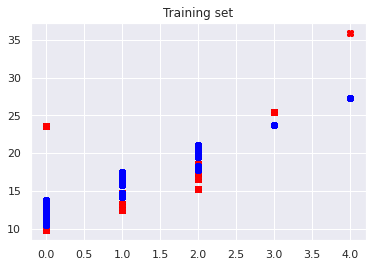

In [ ]:
# Create a figure and a subplot
# fig, ax = plt.subplots()

# # Scatter plot of the data
# # ax.scatter(np.array(X_flat_test)[:, 0], y_test)
# # ax.scatter(np.array(X_flat_test)[:, 1], y_test)
# ax.plot(X_train, y_pred)

# # Show the plot
# plt.show()

y_train_predict = model.predict(X_flat)
print(y_train_predict)
plt.scatter(np.array(X_flat)[:,1], y_train, color='red', marker='X')
plt.scatter(np.array(X_flat)[:,1], y_train_predict, color='blue')
plt.title('Training set Size Variable')
plt.show()

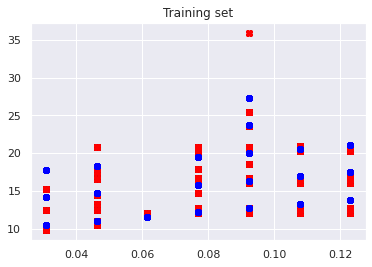

In [ ]:
plt.scatter(np.array(X_flat)[:,0], y_train, color='red', marker='X')
plt.scatter(np.array(X_flat)[:,0], y_train_predict, color='blue')
plt.title('Training set Ingredients Variable')
plt.show()

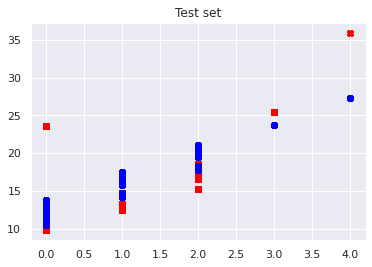

In [ ]:

plt.scatter(np.array(X_flat_test)[:,1], y_test, color='red', marker='X')
plt.scatter(np.array(X_flat)[:,1], y_train_predict, color='blue')
plt.title('Test set')
plt.show()

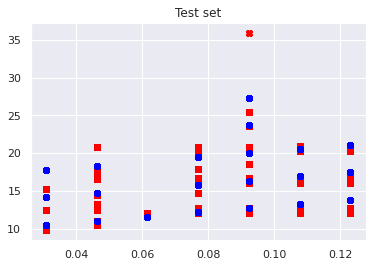

In [ ]:
plt.scatter(np.array(X_flat_test)[:,0], y_test, color='red', marker='X')
plt.scatter(np.array(X_flat)[:,0], y_train_predict, color='blue')
plt.title('Test set')
plt.show()

In [ ]:
import plotly.express as px
# df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(x=np.array(X_flat)[:,1], y=y_train, trendline='ols', title="Size of Pizza Ordered Trendline").update_layout(xaxis_title="Pizza Size", yaxis_title="Number of Pizza Sold")
# fig = px.scatter(x=np.array(X_flat)[:,1], y=y_train_predict)
fig.show()

In [ ]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# from plotly.offline import plot, iplot, init_notebook_mode


# trace1 = go.Scatter(
#     x=np.array(X_flat)[:,1],
#     y=y_train,
#     name='real',
# )
# trace2 = go.Scatter(
#     x=np.array(X_flat)[:,1],
#     y=y_train_predict,
#     name='predict',
# )

# fig = make_subplots(specs=[[{"secondary_y": True}]])
# fig.add_trace(trace1)
# fig.add_trace(trace2,secondary_y=True)
# fig['layout'].update(height = 600, width = 800, title = 'Plot ',xaxis=dict(
#       tickangle=-90
#     ))


In [ ]:
# coefficients = model.coef_

# # # Calculate the predictions for a range of feature values
# x1_min, x1_max = ax.get_xlim()
# x2_min, x2_max = ax.get_xlim()
# x1 = np.linspace(x1_min, x1_max, 100)
# x2 = np.linspace(x2_min, x2_max, 100)
# X1, X2 = np.meshgrid(x1, x2)
# y_pred = coefficients[0] * X1 + coefficients[1] * X2 + model.intercept_

# # Plot the line
# ax.plot(x1, y_pred, color='red')
# ax.plot(x2, y_pred, color='blue')

# # Label the axes
# ax.set_xlabel("Feature 1")
# ax.set_ylabel("Target")

In [ ]:
# import matplotlib.pyplot as plt

# # Assume that X is a 2D array of features and y is a 1D array of target values
# X = [[1, 2], [3, 4], [5, 6], [7, 8]]
# y = [10, 20, 30, 40]

# # Create a figure and a subplot
# fig, ax = plt.subplots()

# # Scatter plot of the data
# ax.scatter(np.array(X)[:, 0], y)
# ax.scatter(np.array(X)[:, 1], y)

# # Fit a line to the data
# model = LinearRegression()
# model.fit(X, y)

# # Get the coefficients of the features
# coefficients = model.coef_

# # Calculate the predictions for a range of feature values
# x1_min, x1_max = ax.get_xlim()
# x2_min, x2_max = ax.get_xlim()
# x1 = np.linspace(x1_min, x1_max, 100)
# x2 = np.linspace(x2_min, x2_max, 100)
# X1, X2 = np.meshgrid(x1, x2)
# y_pred = coefficients[0] * X1 + coefficients[1] * X2 + model.intercept_

# # Plot the line
# ax.plot(x1, y_pred, color='red')

# # Label the axes
# ax.set_xlabel("Feature 1")
# ax.set_ylabel("Target")

# # Show the plot
# plt.show()


In [ ]:
print("Ingredient List: ")
length = len(unique_ing_list)
for i in range(0, length, 2):
  print("{: >2}. {: >30}" .format(str(i+1), unique_ing_list[i]), end='')
  if(i + 1 < length):
    print("{: >10}. {:}" .format(str(i+2), unique_ing_list[i+1]))

print("\n\nType the pizza ingredients you want: ")
print("Format: Sliced Ham, Pepperoni")

ingredient_wanted = str(input())
size_wanted = int(input("Please choose size you want [{'S': 0, 'M': 1, 'L': 2, 'XL': 3, 'XXL': 4}]:" ))

ingredient_wanted_list = list(one_hot_encode(ingredient_wanted, unique_ing_list))
X_feature = [[np.mean(ingredient_wanted_list), size_wanted]]

prediction_price = model.predict(X_feature)
print("Rough Pizza Prize: ", prediction_price)

Ingredient List: 
 1.                     Sliced Ham         2. Pineapple
 3.              Mozzarella Cheese         4. Pepperoni
 5.                      Mushrooms         6. Red Onions
 7.                    Red Peppers         8. Bacon
 9.               Provolone Cheese        10. Smoked Gouda Cheese
11.                  Romano Cheese        12. Blue Cheese
13.                         Garlic        14. Calabrese Salami
15.                      Capocollo        16. Tomatoes
17.                   Green Olives        18. Jalapeno Peppers
19.                       Cilantro        20. Corn
21.                 Chipotle Sauce        22. Chicken
23.        Thai Sweet Chilli Sauce        24. Prosciutto di San Daniele
25.                        Arugula        26. Barbecued Chicken
27.                  Green Peppers        28. Barbecue Sauce
29.                Kalamata Olives        30. Feta Cheese
31.               Beef Chuck Roast        32. Spinach
33.                     Artichokes        

### Veggie whether contains what ingredients only

In [ ]:
veggie_df = merge_df[merge_df['category'] == 'Veggie']
veggie_df.head()

order_id        date      time  order_details_id        pizza_id  \
2          2  2015-01-01  11:57:40                 3   five_cheese_l   
4          2  2015-01-01  11:57:40                 5      mexicana_m   
15         9  2015-01-01  12:52:01                16  green_garden_s   
19         9  2015-01-01  12:52:01                20      mexicana_s   
21         9  2015-01-01  12:52:01                22    spin_pesto_l   

    quantity pizza_type_id size  price                     name category  \
2          1   five_cheese    L  18.50    The Five Cheese Pizza   Veggie   
4          1      mexicana    M  16.00       The Mexicana Pizza   Veggie   
15         1  green_garden    S  12.00   The Green Garden Pizza   Veggie   
19         1      mexicana    S  12.00       The Mexicana Pizza   Veggie   
21         1    spin_pesto    L  20.75  The Spinach Pesto Pizza   Veggie   

                                          ingredients   total  
2   Mozzarella Cheese, Provolone Cheese, Smoked Go...   92.00  
4   Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   92.00  
15  Spinach, Mushrooms, Tomatoes, Green Olives, Fe...  143.25  
19  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...  143.25  
21  Spinach, Artichokes, Tomatoes, Sun-dried Tomat...  143.25

In [ ]:
import numpy as np

# Example usage
ingredients_string = "sugar, flour, eggs"
vocabulary = ["sugar", "flour", "eggs", "milk"]
encoding = one_hot_encode(ingredients_string, vocabulary)
print(encoding)


[1, 1, 1, 0]


In [ ]:
veggie_ingredient_list = [ i.split(", ") for i in veggie_df['ingredients']]
print(veggie_ingredient_list)

[['Mozzarella Cheese', 'Provolone Cheese', 'Smoked Gouda Cheese', 'Romano Cheese', 'Blue Cheese', 'Garlic'], ['Tomatoes', 'Red Peppers', 'Jalapeno Peppers', 'Red Onions', 'Cilantro', 'Corn', 'Chipotle Sauce', 'Garlic'], ['Spinach', 'Mushrooms', 'Tomatoes', 'Green Olives', 'Feta Cheese'], ['Tomatoes', 'Red Peppers', 'Jalapeno Peppers', 'Red Onions', 'Cilantro', 'Corn', 'Chipotle Sauce', 'Garlic'], ['Spinach', 'Artichokes', 'Tomatoes', 'Sun-dried Tomatoes', 'Garlic', 'Pesto Sauce'], ['Mushrooms', 'Tomatoes', 'Red Peppers', 'Green Peppers', 'Red Onions', 'Zucchini', 'Spinach', 'Garlic'], ['Tomatoes', 'Red Peppers', 'Jalapeno Peppers', 'Red Onions', 'Cilantro', 'Corn', 'Chipotle Sauce', 'Garlic'], ['Tomatoes', 'Red Peppers', 'Jalapeno Peppers', 'Red Onions', 'Cilantro', 'Corn', 'Chipotle Sauce', 'Garlic'], ['Mozzarella Cheese', 'Provolone Cheese', 'Smoked Gouda Cheese', 'Romano Cheese', 'Blue Cheese', 'Garlic'], ['Ricotta Cheese', 'Gorgonzola Piccante Cheese', 'Mozzarella Cheese', 'Parmigi

In [ ]:
flat_veggie_ingredient_list = list(chain.from_iterable(veggie_ingredient_list))

flat_veggie_ingredient_list = pd.DataFrame(flat_veggie_ingredient_list, columns = ['ingredients'])
flat_veggie_ingredient_list.value_counts()

ingredients               
Garlic                        9539
Tomatoes                      5885
Spinach                       5809
Red Onions                    5321
Red Peppers                   3941
Mushrooms                     3929
Feta Cheese                   3342
Mozzarella Cheese             3209
Artichokes                    2855
Zucchini                      2485
Pesto Sauce                   1932
Sun-dried Tomatoes            1880
Gorgonzola Piccante Cheese    1850
Parmigiano Reggiano Cheese    1850
Ricotta Cheese                1850
Green Peppers                 1510
Jalapeno Peppers              1456
Chipotle Sauce                1456
Cilantro                      1456
Corn                          1456
Romano Cheese                 1359
Smoked Gouda Cheese           1359
Provolone Cheese              1359
Blue Cheese                   1359
Green Olives                   987
Eggplant                       975
Plum Tomatoes                  923
Kalamata Olives             

In [ ]:
unique_ing_veggie_list = flat_veggie_ingredient_list['ingredients'].unique().tolist()

In [ ]:
veggie_ingredient_list_no_split = [ i for i in veggie_df['ingredients']]


In [ ]:
result_encoding = [list(one_hot_encode(i, unique_ing_veggie_list)) for i in veggie_ingredient_list_no_split]

In [ ]:
for i in range(0, 3):
  print(result_encoding[i], end="\n")

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
y = veggie_df['price'].values.tolist()

In [ ]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [ ]:
encoded

array([8, 4, 0, ..., 5, 7, 9])

In [ ]:
clf = DecisionTreeClassifier()
# Fit the classifier to the data
clf.fit(result_encoding, encoded)

# # Make a prediction for a new one-hot encoded vector
# new_vector = [1, 0, 0, 0]
# prediction = clf.predict([new_vector])
# print(prediction)

DecisionTreeClassifier()

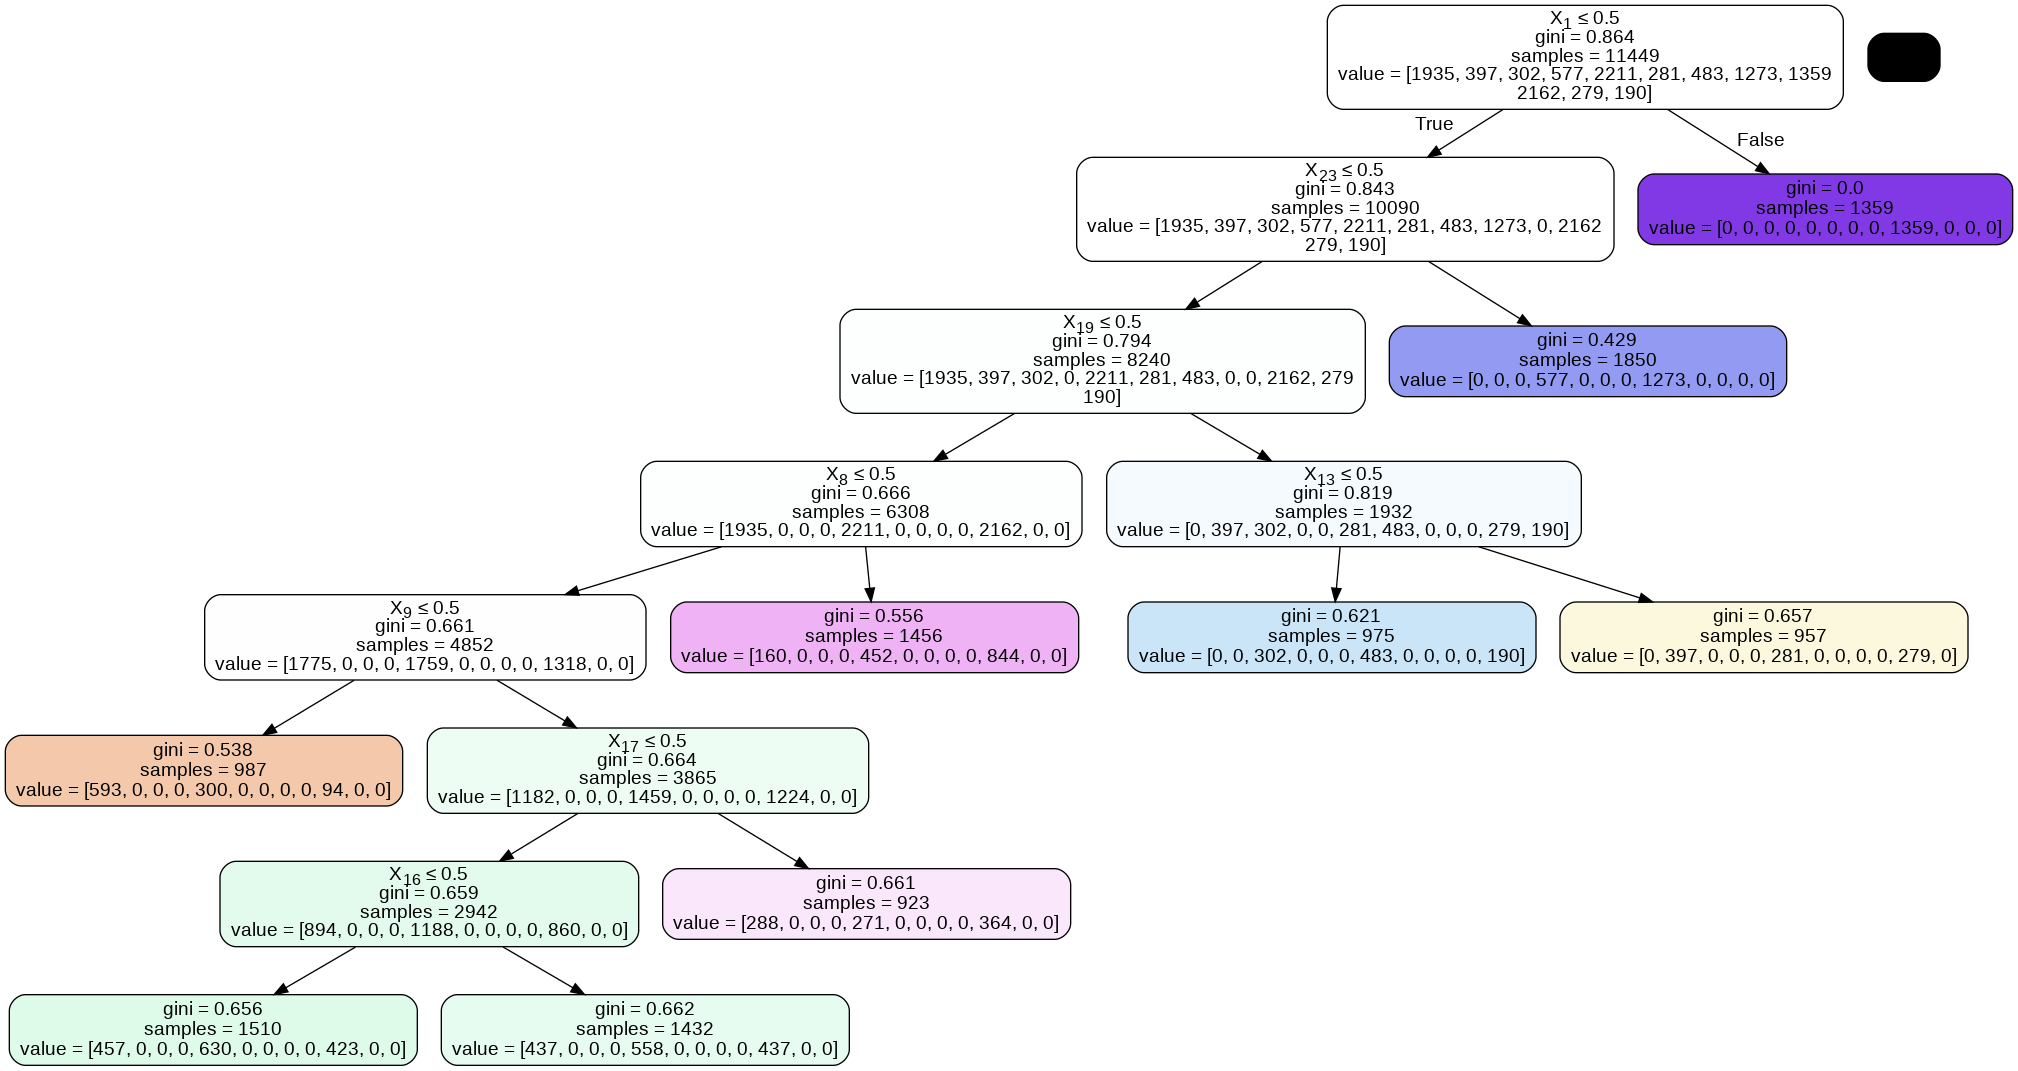

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = None)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('price_veggie.png')
Image(graph.create_png())

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# # Assume that X is a 2D array of one-hot encoded vectors and y is a 1D array of labels
# X = [[1, 0, 0, 0], [0, 1, 1, 0], [1, 0, 1, 1]]
# y = [0, 1, 1]

# # Create a decision tree classifier
# clf = DecisionTreeClassifier()

# # Fit the classifier to the data
# clf.fit(X, y)

# # Make a prediction for a new one-hot encoded vector
# new_vector = [1, 0, 0, 0]
# prediction = clf.predict([new_vector])
# print(prediction)


### Correlation Matrix

In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 8.3 MB/s 
     |████████████████████████████████| 293 kB 50.3 MB/s 
     |████████████████████████████████| 17.3 MB 605 kB/s 
     |████████████████████████████████| 280 kB 48.6 MB/s 
     |████████████████████████████████| 33.8 MB 62.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
# !pip install matplotlib==3.5.3


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [ ]:
orders_df = pd.read_csv("data/orders.csv")
order_details_df = pd.read_csv("data/order_details.csv")
pizza_types_df = pd.read_csv("data/pizza_types.csv", encoding='unicode_escape')
pizza_df = pd.read_csv("data/pizzas.csv")

merge_df = (orders_df.merge(order_details_df, how='left', on=['order_id'])).merge(pizza_df,how='left', on=['pizza_id']).merge(pizza_types_df,how="left", on=['pizza_type_id'])

total_price_order = merge_df[['order_id', 'quantity', 'price']].copy()
total_price_order['sub_total'] = total_price_order['quantity'] * total_price_order['price']
new_total_price_order = total_price_order.groupby('order_id').sum()
merge_df = merge_df.merge(new_total_price_order[['sub_total']], how='left', on=['order_id'])
merge_df = merge_df.rename(columns = {'sub_total': 'total'})

In [ ]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

In [ ]:
pizza_all_df = pizza_df.merge(pizza_types_df, how='left', on=['pizza_type_id'])
pizza_all_df

pizza_id pizza_type_id size  price  \
0       bbq_ckn_s       bbq_ckn    S  12.75   
1       bbq_ckn_m       bbq_ckn    M  16.75   
2       bbq_ckn_l       bbq_ckn    L  20.75   
3      cali_ckn_s      cali_ckn    S  12.75   
4      cali_ckn_m      cali_ckn    M  16.75   
..            ...           ...  ...    ...   
91  spinach_fet_m   spinach_fet    M  16.00   
92  spinach_fet_l   spinach_fet    L  20.25   
93   veggie_veg_s    veggie_veg    S  12.00   
94   veggie_veg_m    veggie_veg    M  16.00   
95   veggie_veg_l    veggie_veg    L  20.25   

                                 name category  \
0          The Barbecue Chicken Pizza  Chicken   
1          The Barbecue Chicken Pizza  Chicken   
2          The Barbecue Chicken Pizza  Chicken   
3        The California Chicken Pizza  Chicken   
4        The California Chicken Pizza  Chicken   
..                                ...      ...   
91         The Spinach and Feta Pizza   Veggie   
92         The Spinach and Feta Pizza   Veggie   
93  The Vegetables + Vegetables Pizza   Veggie   
94  The Vegetables + Vegetables Pizza   Veggie   
95  The Vegetables + Vegetables Pizza   Veggie   

                                          ingredients  
0   Barbecued Chicken, Red Peppers, Green Peppers,...  
1   Barbecued Chicken, Red Peppers, Green Peppers,...  
2   Barbecued Chicken, Red Peppers, Green Peppers,...  
3   Chicken, Artichoke, Spinach, Garlic, Jalapeno ...  
4   Chicken, Artichoke, Spinach, Garlic, Jalapeno ...  
..                                                ...  
91  Spinach, Mushrooms, Red Onions, Feta Cheese, G...  
92  Spinach, Mushrooms, Red Onions, Feta Cheese, G...  
93  Mushrooms, Tomatoes, Red Peppers, Green Pepper...  
94  Mushrooms, Tomatoes, Red Peppers, Green Pepper...  
95  Mushrooms, Tomatoes, Red Peppers, Green Pepper...  

[96 rows x 7 columns]

/usr/local/lib/python3.8/dist-packages/dython/nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/dython/nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/dython/nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/dython/nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warning

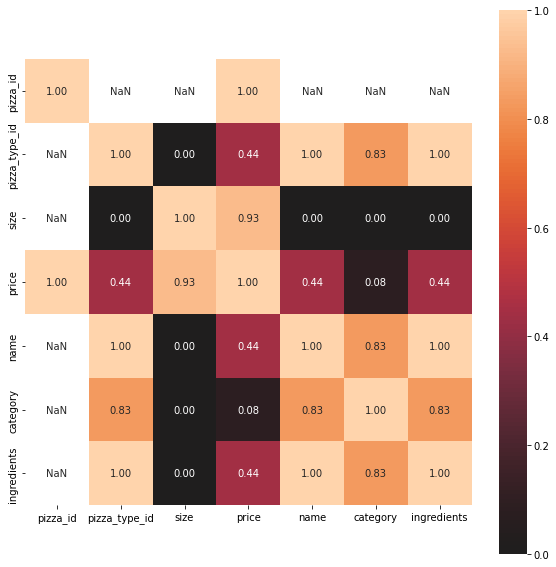

In [ ]:
categorical_features_pizza_all=identify_nominal_columns(pizza_all_df)
categorical_features_pizza_all
complete_correlation_pizza_all= associations(pizza_all_df, filename= 'complete_correlation.png', figsize=(10,10))

In [ ]:
pizza_all_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

pizza_id  pizza_type_id      size     price      name  \
pizza_id       1.000000       0.999487  0.017340  0.447547  0.999487   
pizza_type_id  0.999487       1.000000 -0.013851  0.441178  1.000000   
size           0.017340      -0.013851  1.000000  0.169390 -0.013851   
price          0.447547       0.441178  0.169390  1.000000  0.441178   
name           0.999487       1.000000 -0.013851  0.441178  1.000000   
category       0.965580       0.966508 -0.038389  0.502680  0.966508   
ingredients    0.999487       1.000000 -0.013851  0.441178  1.000000   

               category  ingredients  
pizza_id       0.965580     0.999487  
pizza_type_id  0.966508     1.000000  
size          -0.038389    -0.013851  
price          0.502680     0.441178  
name           0.966508     1.000000  
category       1.000000     0.966508  
ingredients    0.966508     1.000000

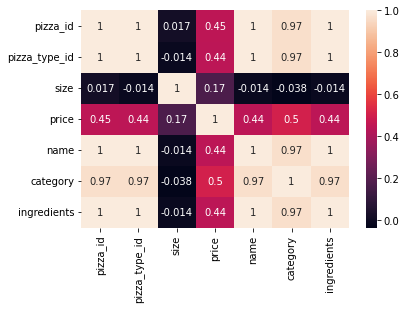

In [ ]:
sns.heatmap(pizza_all_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1), annot=True)
plt.show()

In [ ]:
pizza_all_df['ingredients'] = [i.split(", ") for i in pizza_all_df['ingredients']]
pizza_all_df

pizza_id pizza_type_id size  price  \
0       bbq_ckn_s       bbq_ckn    S  12.75   
1       bbq_ckn_m       bbq_ckn    M  16.75   
2       bbq_ckn_l       bbq_ckn    L  20.75   
3      cali_ckn_s      cali_ckn    S  12.75   
4      cali_ckn_m      cali_ckn    M  16.75   
..            ...           ...  ...    ...   
91  spinach_fet_m   spinach_fet    M  16.00   
92  spinach_fet_l   spinach_fet    L  20.25   
93   veggie_veg_s    veggie_veg    S  12.00   
94   veggie_veg_m    veggie_veg    M  16.00   
95   veggie_veg_l    veggie_veg    L  20.25   

                                 name category  \
0          The Barbecue Chicken Pizza  Chicken   
1          The Barbecue Chicken Pizza  Chicken   
2          The Barbecue Chicken Pizza  Chicken   
3        The California Chicken Pizza  Chicken   
4        The California Chicken Pizza  Chicken   
..                                ...      ...   
91         The Spinach and Feta Pizza   Veggie   
92         The Spinach and Feta Pizza   Veggie   
93  The Vegetables + Vegetables Pizza   Veggie   
94  The Vegetables + Vegetables Pizza   Veggie   
95  The Vegetables + Vegetables Pizza   Veggie   

                                          ingredients  
0   [Barbecued Chicken, Red Peppers, Green Peppers...  
1   [Barbecued Chicken, Red Peppers, Green Peppers...  
2   [Barbecued Chicken, Red Peppers, Green Peppers...  
3   [Chicken, Artichoke, Spinach, Garlic, Jalapeno...  
4   [Chicken, Artichoke, Spinach, Garlic, Jalapeno...  
..                                                ...  
91  [Spinach, Mushrooms, Red Onions, Feta Cheese, ...  
92  [Spinach, Mushrooms, Red Onions, Feta Cheese, ...  
93  [Mushrooms, Tomatoes, Red Peppers, Green Peppe...  
94  [Mushrooms, Tomatoes, Red Peppers, Green Peppe...  
95  [Mushrooms, Tomatoes, Red Peppers, Green Peppe...  

[96 rows x 7 columns]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
encoded = pd.DataFrame(mlb.fit_transform(pizza_all_df['ingredients']), columns=mlb.classes_, index=pizza_all_df.index)
result = pd.concat([pizza_all_df[['pizza_id', 'pizza_type_id', 'size', 'price', 'name', 'category']], encoded], axis=1)

In [ ]:
result

pizza_id pizza_type_id size  price  \
0       bbq_ckn_s       bbq_ckn    S  12.75   
1       bbq_ckn_m       bbq_ckn    M  16.75   
2       bbq_ckn_l       bbq_ckn    L  20.75   
3      cali_ckn_s      cali_ckn    S  12.75   
4      cali_ckn_m      cali_ckn    M  16.75   
..            ...           ...  ...    ...   
91  spinach_fet_m   spinach_fet    M  16.00   
92  spinach_fet_l   spinach_fet    L  20.25   
93   veggie_veg_s    veggie_veg    S  12.00   
94   veggie_veg_m    veggie_veg    M  16.00   
95   veggie_veg_l    veggie_veg    L  20.25   

                                 name category  Alfredo Sauce  Anchovies  \
0          The Barbecue Chicken Pizza  Chicken              0          0   
1          The Barbecue Chicken Pizza  Chicken              0          0   
2          The Barbecue Chicken Pizza  Chicken              0          0   
3        The California Chicken Pizza  Chicken              0          0   
4        The California Chicken Pizza  Chicken              0          0   
..                                ...      ...            ...        ...   
91         The Spinach and Feta Pizza   Veggie              0          0   
92         The Spinach and Feta Pizza   Veggie              0          0   
93  The Vegetables + Vegetables Pizza   Veggie              0          0   
94  The Vegetables + Vegetables Pizza   Veggie              0          0   
95  The Vegetables + Vegetables Pizza   Veggie              0          0   

    Artichoke  Artichokes  ...  Sliced Ham  Smoked Gouda Cheese  \
0           0           0  ...           0                    0   
1           0           0  ...           0                    0   
2           0           0  ...           0                    0   
3           1           0  ...           0                    0   
4           1           0  ...           0                    0   
..        ...         ...  ...         ...                  ...   
91          0           0  ...           0                    0   
92          0           0  ...           0                    0   
93          0           0  ...           0                    0   
94          0           0  ...           0                    0   
95          0           0  ...           0                    0   

    Soppressata Salami  Spinach  Sun-dried Tomatoes  Thai Sweet Chilli Sauce  \
0                    0        0                   0                        0   
1                    0        0                   0                        0   
2                    0        0                   0                        0   
3                    0        1                   0                        0   
4                    0        1                   0                        0   
..                 ...      ...                 ...                      ...   
91                   0        1                   0                        0   
92                   0        1                   0                        0   
93                   0        1                   0                        0   
94                   0        1                   0                        0   
95                   0        1                   0                        0   

    Thyme  Tomatoes  Zucchini  Nduja Salami  
0       0         1         0              0  
1       0         1         0              0  
2       0         1         0              0  
3       0         0         0              0  
4       0         0         0              0  
..    ...       ...       ...            ...  
91      0         0         0              0  
92      0         0         0              0  
93      0         1         1              0  
94      0         1         1              0  
95      0         1         1              0  

[96 rows x 71 columns]

In [ ]:
categorical_features_pizza_all=identify_nominal_columns(result)
categorical_features_pizza_all

['pizza_id', 'pizza_type_id', 'size', 'name', 'category']

/usr/local/lib/python3.8/dist-packages/dython/nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/dython/nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/dython/nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/dython/nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warning

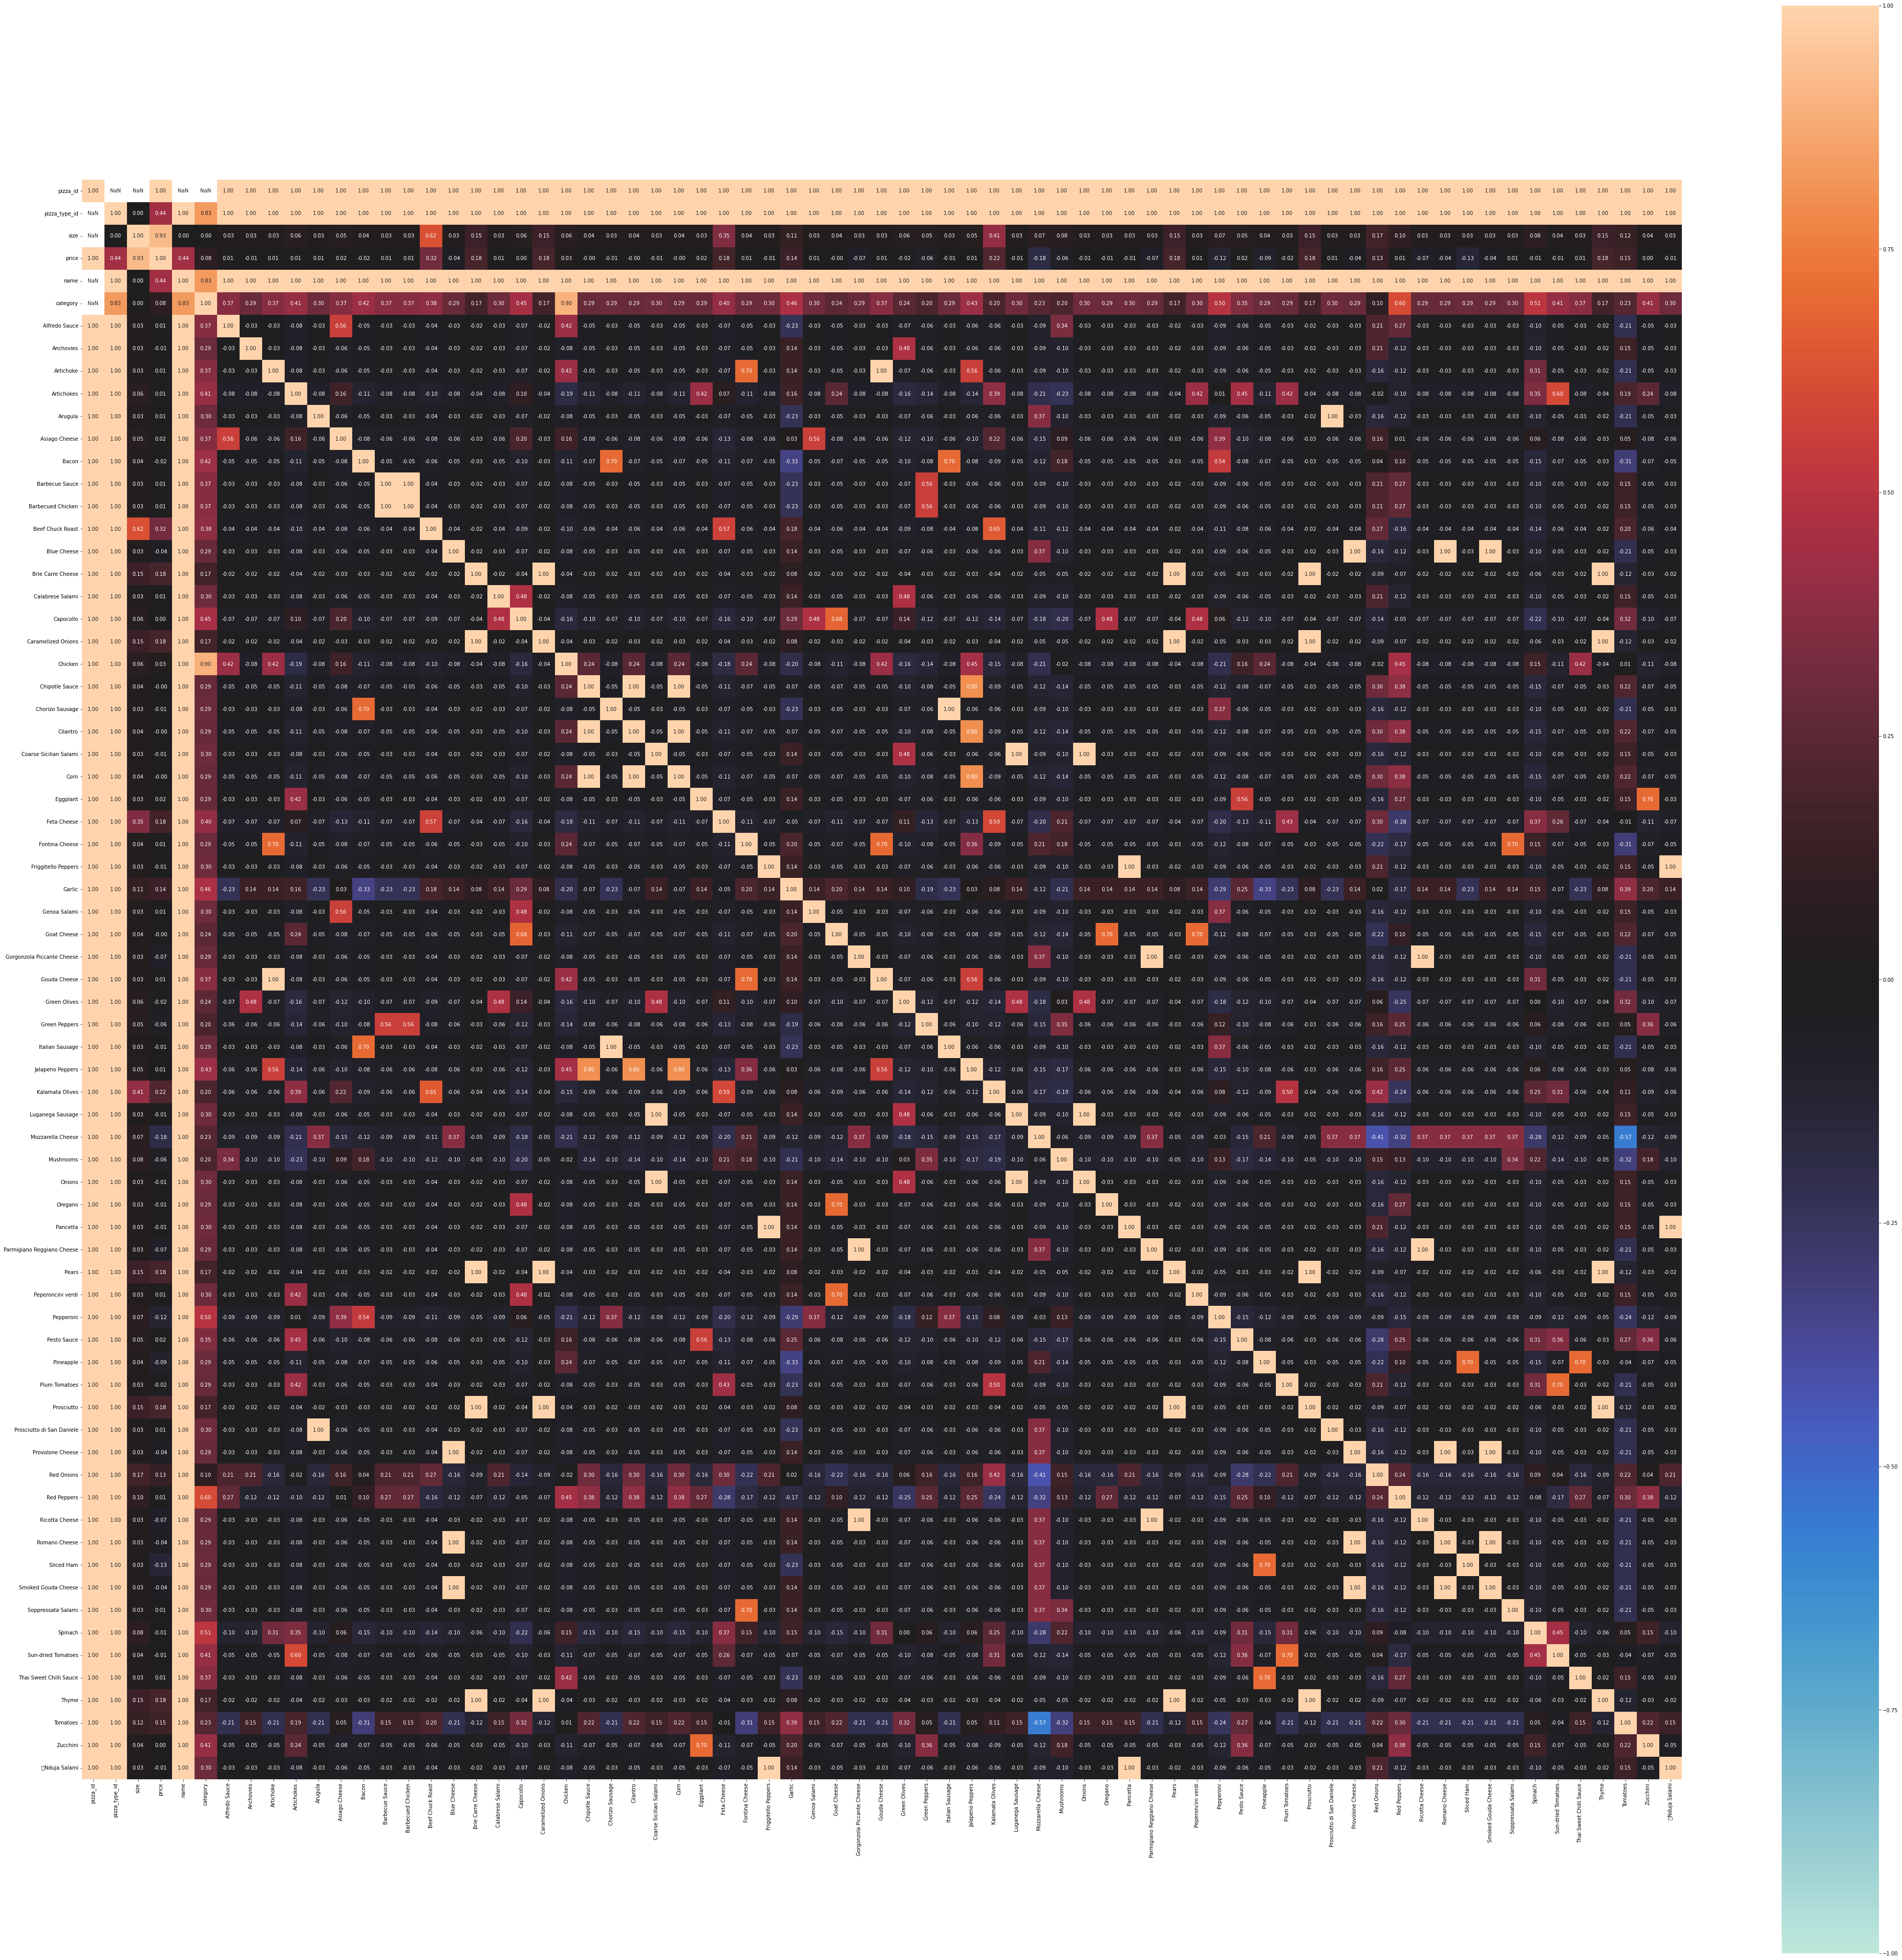

In [ ]:
complete_correlation_pizza_all= associations(result, filename= 'complete_correlation.png', figsize=(70,70))

In [ ]:
all_df = merge_df.copy()

In [ ]:
all_df.head()

order_id        date      time  order_details_id       pizza_id  quantity  \
0         1  2015-01-01  11:38:36                 1     hawaiian_m         1   
1         2  2015-01-01  11:57:40                 2  classic_dlx_m         1   
2         2  2015-01-01  11:57:40                 3  five_cheese_l         1   
3         2  2015-01-01  11:57:40                 4    ital_supr_l         1   
4         2  2015-01-01  11:57:40                 5     mexicana_m         1   

  pizza_type_id size  price                       name category  \
0      hawaiian    M  13.25         The Hawaiian Pizza  Classic   
1   classic_dlx    M  16.00   The Classic Deluxe Pizza  Classic   
2   five_cheese    L  18.50      The Five Cheese Pizza   Veggie   
3     ital_supr    L  20.75  The Italian Supreme Pizza  Supreme   
4      mexicana    M  16.00         The Mexicana Pizza   Veggie   

                                         ingredients  total  
0           Sliced Ham, Pineapple, Mozzarella Cheese  13.25  
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...  92.00  
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...  92.00  
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...  92.00  
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...  92.00

In [ ]:
categorical_features=identify_nominal_columns(all_df)
categorical_features

['date',
 'time',
 'pizza_id',
 'pizza_type_id',
 'size',
 'name',
 'category',
 'ingredients']

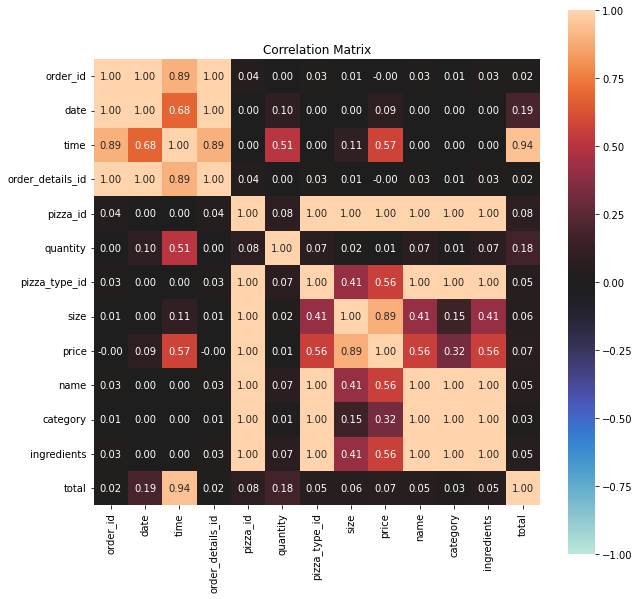

In [ ]:
complete_correlation= associations(all_df, filename= 'complete_correlation.png', figsize=(10,10), title="Correlation Matrix")